# Projet P2 OC Data Scientist: Analysez des données de systèmes éducatifs

Les indicateurs EdStats de la Banque mondiale contient plus de 3000 indicateurs permettant des comparaisons internationales dans le domaine de l'éducation, comme l'accès à l'éducation, la progression, l'achèvement, l'alphabétisation, les enseignants, la population et les dépenses. Les indicateurs couvrent le cycle de l'éducation du préprimaire à l'enseignement professionnel et supérieur et  proposent des données sur les résultats d'apprentissage des évaluations internationales et régionales des apprentissages (par exemple PISA, TIMSS, PIRLS), des données d'équité provenant d'enquêtes auprès des ménages et des données de projection à l'horizon 2050.

L'entreprise Academy propose des contenus de formation en ligne pour un public de niveau lycée et université.
L'objectif de la mission est de réaliser une première analyse exploratoire, pour déterminer si les données sur l’éducation de la banque mondiale sont susceptibles d'être exploiter pour un projet d’expansion à l'international.

#### Objectifs du projet  - réponses aux questions suivantes : 

- Quels sont les pays avec un fort potentiel de clients pour nos services ?
- Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?
- Dans quels pays l'entreprise doit-elle opérer en priorité ?


#### Démarche adoptée :

- Description du jeu de données
- Analyse pré-exploratoire des données
    - Simplification de jeu de données et nettoyage des données
    - Sélection d'indicateurs pour répondre aux objectifs du projet
        - Application des différents filtrages sur les données
        - Analyse de la qualité des données (distribution / moyenne / médiane / écart-type) pour les indicateurs sélectionnées 
- Détermination d'un score d'attractivité pour les pays retenus
- Réponse aux questions soulevées par le projet
- Conclusion sur la pertinence du projet

    
Les données utilisés sont disponible à l'adresse suivante : https://datacatalog.worldbank.org/dataset/education-statistics


## 1. Mise en place environnement et import des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings


%matplotlib inline

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', None)
pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.float_format = '{:,.2f}'.format
warnings.simplefilter(action="ignore", category=FutureWarning)

# Versions des librairies
print("Version librairie pandas: " + pd.__version__)
print("Version librairie numpy: " + np.__version__)
print("Version librairie matplotlib: " + matplotlib.__version__)
print("Version librairie seaborn: " + sns.__version__)

Version librairie pandas: 1.1.3
Version librairie numpy: 1.19.2
Version librairie matplotlib: 3.3.2
Version librairie seaborn: 0.11.0


## 2. Fonctions

In [2]:
# Fonction qui renvoie indicator name par topic dans le dataset data
def renvoieIndByTopic(dfIn, listTopic):
    for topic in listTopic:
        print('---------------------------------')
        print('Catégorie : '+topic)
        dfTemp = dfIn.loc[dfIn['Topic'] == topic]
        print(dfTemp['Indicator Name'].unique())
        print(' ')
    return None

In [3]:
# Fonction qui renvoie indicator name par categ indic dans le dataset data
def renvoieIndByCategIndic(dfIn, CategIndic, motif):
    if motif == 'none':
         df_ind = dfIn[dfIn["Categ Indic"] == CategIndic]
    else:
         df_ind = dfIn[(dfIn["Categ Indic"] == CategIndic) & (dfIn['Indicator Name'].str.contains(motif))]
    for indicateur in df_ind["Indicator Name"].unique() :
        code_ind= df_ind[df_ind["Indicator Name"] == indicateur][['Indicator Code']]
        print("Code indicateur: " + code_ind['Indicator Code'].unique() + " - Nom indicateur: " + indicateur)
    return None    

## 3. Chargement et description des données

In [4]:
# Chargement des données des différents datasets (country, data, countryseries, series, footnote)
path_data = "D:/Donnees/Formation Data Scientist - Openclassroms/Projet 2/P2_David_Capelle/Edstats_csv"

country = pd.read_csv(os.path.join(path_data, "EdStatsCountry" + ".csv"), low_memory=False)
countryseries = pd.read_csv(os.path.join(path_data, "EdStatsCountry-Series" + ".csv"), low_memory=False)
data = pd.read_csv(os.path.join(path_data, "EdStatsData" + ".csv"), low_memory=False)
footnote = pd.read_csv(os.path.join(path_data, "EdStatsFootNote" + ".csv"), low_memory=False)
series = pd.read_csv(os.path.join(path_data, "EdStatsSeries" + ".csv"), low_memory=False)

 ### 3.1 **Dataset EdStatsCountry**

In [5]:
# aperçu des 5 premières lignes du dataframe country
country.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from official government statistics; 1994-1999 from UN databases. Base year has changed from 1995 to 2000.,Latin America & Caribbean,High income: nonOECD,AW,2000,nan,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accounts methodology.,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,nan,"2,012.00",NaN,nan
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period for national accounts data: FY (from 2013 are CY). National accounts data are sourced from the IMF and differ from the Central Statistics Organization numbers due to exclusion of the opium economy.,South Asia,Low income,AF,2002/03,nan,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accounts methodology.,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,nan,"2,012.00",2000,nan
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data, national accounts data were revised for 2000 onward; the base year changed to 2002.",Sub-Saharan Africa,Upper middle income,AO,2002,nan,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accounts methodology.,1991–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,nan,nan,2005,nan
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are rescaled.,"1,996.00",Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accounts methodology.,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09","Living Standards Measurement Study Survey (LSMS), 2012",Yes,2012,"2,010.00","2,012.00",2006,nan
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,1990,nan,NaN,NaN,NaN,Country uses the 1968 System of National Accounts methodology.,NaN,NaN,NaN,NaN,Special trade system,NaN,NaN,2011. Population figures compiled from administrative registers.,NaN,NaN,Yes,NaN,nan,"2,006.00",NaN,nan


In [6]:
# Affichage des différentes colonnes du dataframe country
country.columns

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31'],
      dtype='object')

In [7]:
# Dimension du dataframe country
country.shape

(241, 32)

Le dataset country comporte 241 lignes et 32 variables.

In [8]:
# Structure du dataframe country
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

La colonne "Unnamed: 31" contient uniquement des valeurs manquantes.

In [9]:
# Résumé statistique du dataframe
country.describe(include='all')

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
count,241,241,241,241,238,215,145,214,214,240,205,32.00,197,144,58,215,47,145,181,124,200,161,181,213,141,160,111,142,107.00,185.00,179,0.00
unique,241,241,241,241,238,152,131,7,5,240,43,nan,2,3,2,3,32,3,1,3,2,2,2,27,60,75,2,35,nan,nan,20,nan
top,MHL,Europe & Central Asia (all income levels),Botswana,Europe & Central Asia (all income levels),IE,Euro,"April 2012 database update: Based on official government statistics, national accounts data were revised for 2000 onward; the base year changed to 2006.",Europe & Central Asia,Upper middle income,IE,2005,nan,Value added at basic prices (VAB),IBRD,HIPC,Country uses the 1993 System of National Accounts methodology.,1990–95,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),2011,"Multiple Indicator Cluster Survey (MICS), 2012","Integrated household survey (IHS), 2012",Yes,2010,nan,nan,2000,nan
freq,1,1,1,1,1,23,6,57,55,1,34,nan,163,67,40,165,8,98,181,107,106,95,110,59,10,15,110,36,nan,nan,40,nan
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"2,001.53",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"2,008.10","2,010.99",NaN,nan
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.62,2.57,NaN,nan
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,987.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"2,000.00","1,995.00",NaN,nan
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,996.75",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"2,007.50","2,011.00",NaN,nan
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"2,002.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"2,009.00","2,012.00",NaN,nan
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"2,005.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"2,010.00","2,012.00",NaN,nan


La colonne "Country Code" correspond à l'identifiant unique (clé primaire) du dataset country.

Les pays (colonne" Country Code") sont répartis en 7 régions (colonne "Region").

In [10]:
# Affichage des différentes régions
country["Region"].unique()

array(['Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa',
       'Europe & Central Asia', nan, 'Middle East & North Africa',
       'East Asia & Pacific', 'North America'], dtype=object)

In [11]:
# Affichage des différents pays
country["Short Name"].unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'The Bahamas',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland',
       'Channel Islands', 'Chile', 'China', "Côte d'Ivoire", 'Cameroon',
       'Dem. Rep. Congo', 'Congo', 'Colombia', 'Comoros', 'Cabo Verde',
       'Costa Rica', 'Cuba', 'Curaçao', 'Cayman Islands', 'Cyprus',
       'Czech Republic', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria',
       'East Asia & Pacific (developing only)',
       'East Asia & Pacific (all income levels)',
       'Europe & Central Asia (developing only)',


In [12]:
# Affichage des pays avec la colonne "Region" avec la valeur Nan
df_regions = country[["Short Name", "Region"]]
df_regions[df_regions["Region"].isnull() == True]['Short Name']

5                                          Arab World
57              East Asia & Pacific (developing only)
58            East Asia & Pacific (all income levels)
59            Europe & Central Asia (developing only)
60          Europe & Central Asia (all income levels)
63                                          Euro area
68                                     European Union
78                                          Gibraltar
89                                        High income
92             Heavily indebted poor countries (HIPC)
116       Latin America & Caribbean (developing only)
122     Latin America & Caribbean (all income levels)
123      Least developed countries: UN classification
124                                        Low income
127                               Lower middle income
128                               Low & middle income
140    Middle East & North Africa (all income levels)
143                                     Middle income
148      Middle East & North

In [13]:
# Nombre de pays avec la colonne "Region" avec la valeur Nan
df_regions[df_regions["Region"].isnull() == True].count()

Short Name    27
Region         0
dtype: int64

Il y a 27 pays qui ne sont pas véritablement des pays, mais des regoupements de pays. En fait, il y a 214 pays dans le dataset country.

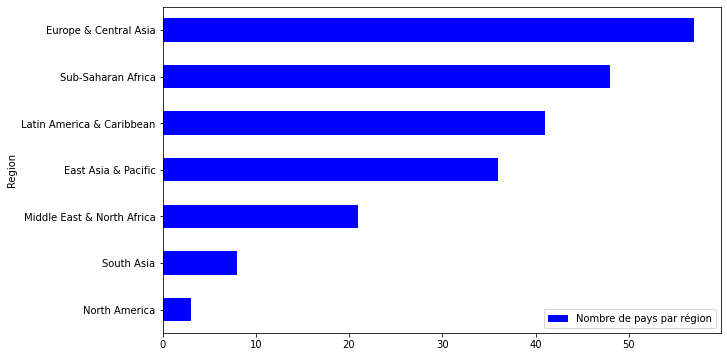

In [14]:
# Affichage du nombre de pays par région
fig, ax = plt.subplots(figsize=(10, 6))
table_country = country.groupby(['Region']).size().reset_index(name='counts').sort_values('counts')
table_country.plot(x = 'Region',kind = "barh", color="blue", ax=ax)
ax.legend(["Nombre de pays par région"]);

 ### 3.2 **Dataset EdStatsCountry-Series**

In [15]:
# Aperçu des 5 premières lignes du dataframe countryseries
countryseries.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population Prospects,nan
1,ABW,SP.POP.GROW,Data sources: United Nations World Population Prospects,nan
2,AFG,SP.POP.GROW,Data sources: United Nations World Population Prospects,nan
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,nan
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population Prospects,nan


In [16]:
# Affichage des différentes colonnes du dataframe countryseries
countryseries.columns

Index(['CountryCode', 'SeriesCode', 'DESCRIPTION', 'Unnamed: 3'], dtype='object')

In [17]:
# Dimension du dataframe countryseries
countryseries.shape

(613, 4)

Le dataset countryseries comporte 613 lignes et 4 variables.

In [18]:
# Structure du dataframe countryseries
countryseries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


La colonne "Unnamed: 3" contient uniquement des valeurs manquantes.

In [19]:
# Résumé statistique du dataframe countryseries
countryseries.describe(include='all')

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
count,613,613,613,0.00
unique,211,21,97,nan
top,MDA,SP.POP.GROW,Data sources : United Nations World Population Prospects,nan
freq,18,211,154,nan
mean,NaN,NaN,NaN,nan
std,NaN,NaN,NaN,nan
min,NaN,NaN,NaN,nan
25%,NaN,NaN,NaN,nan
50%,NaN,NaN,NaN,nan
75%,NaN,NaN,NaN,nan


In [20]:
# Vérification si le couple (CountryCode, SeriesCode) est bien l'identifiant unique du dataset countryseries
identUniq = countryseries.loc[:, ['CountryCode', 'SeriesCode']].drop_duplicates()
print("Code pays et Code indicateur suffisent à idendifier chaque ligne du jeu de données : {}".format(len(identUniq)==len(countryseries)))

Code pays et Code indicateur suffisent à idendifier chaque ligne du jeu de données : True


Par conséquent, le couple (CountryCode, SeriesCode) est bien l'identifiant unique du dataset countryseries.

On ne retrouve pas le même nombre de pays dans countryseries (211) que dans country (241). Quels sont les pays qui diffèrent?

In [21]:
# Détermination des pays présents dans le dataset country, mais non présents dans le dataset countryseries
country[~country['Country Code'].isin(countryseries['CountryCode'].unique())][['Short Name']].sort_values(by='Short Name')

,Short Name
5,Arab World
47,Curaçao
58,East Asia & Pacific (all income levels)
57,East Asia & Pacific (developing only)
63,Euro area
60,Europe & Central Asia (all income levels)
59,Europe & Central Asia (developing only)
68,European Union
92,Heavily indebted poor countries (HIPC)
89,High income


In [22]:
# Nombre de pays en moins dans le dataset countryseries
country[~country['Country Code'].isin(countryseries['CountryCode'].unique())][['Short Name']].shape[0]

30

Il y a bien 30 pays en moins dans la dataset countryseries par rapport au dataset country. Il manque notamment des regroupements par région et d'autres regroupements (par niveau de revenus,...).

### 3.3 **Dataset EdStatsData.csv**

In [23]:
# Aperçu des 5 premières lignes du dataframe data
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, both sexes (%)",UIS.NERA.2,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, female (%)",UIS.NERA.2.F,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, gender parity index (GPI)",UIS.NERA.2.GPI,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, male (%)",UIS.NERA.2.M,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sexes (%)",SE.PRM.TENR,54.82,54.89,56.21,57.27,57.99,59.37,61.00,61.92,62.69,64.38,65.62,66.09,66.61,67.29,68.51,69.03,69.94,71.04,71.69,71.70,72.00,72.60,70.03,70.46,72.65,71.81,73.90,74.43,75.11,76.25,77.25,78.80,80.05,80.81,81.61,82.49,82.69,83.28,84.01,84.20,85.21,85.25,86.10,85.51,85.32,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [24]:
# Affichage des différentes colonnes du dataframe data
data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [25]:
# Dimension du dataframe data
data.shape

(886930, 70)

Le dataset data comporte 886930 lignes et 70 variables.

In [26]:
# Structure du dataframe data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

La colonne "Unnamed: 69" contient uniquement des valeurs manquantes.

In [27]:
# Résumé statistique du dataframe data
data.describe(include='all')

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
count,886930,886930,886930,886930,"72,288.00","35,537.00","35,619.00","35,545.00","35,730.00","87,306.00","37,483.00","37,574.00","37,576.00","36,809.00","89,122.00","38,777.00","37,511.00","38,460.00","38,606.00","90,296.00","39,372.00","38,641.00","38,552.00","37,540.00","124,405.00","74,437.00","75,543.00","75,793.00","77,462.00","131,361.00","76,807.00","73,453.00","84,914.00","118,839.00","176,676.00","123,509.00","124,205.00","130,363.00","128,814.00","184,108.00","140,312.00","137,272.00","134,387.00","142,108.00","242,442.00","146,012.00","147,264.00","137,509.00","113,789.00","131,058.00","16,460.00",143.00,"51,436.00","51,436.00","51,436.00","51,436.00","51,436.00","51,436.00","51,436.00","51,436.00","51,436.00","51,436.00","51,436.00","51,436.00","51,436.00","51,436.00","51,436.00","51,436.00","51,436.00",0.00
unique,242,242,3665,3665,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
top,Panama,CYM,Percentage of students in upper secondary vocational education who are female (%),UIS.XSPENDP.23.FDPUB.FNCUR,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
freq,3665,3665,242,242,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
mean,NaN,NaN,NaN,NaN,"1,974,772,449.59","4,253,638,470.19","4,592,364,905.26","5,105,005,610.89","5,401,492,903.41","2,314,287,511.57","5,731,808,142.09","6,124,437,154.16","6,671,488,719.03","7,436,723,955.05","3,283,897,508.64","7,664,969,392.47","7,913,721,582.27","7,856,908,292.00","8,118,001,691.30","3,622,763,069.55","9,156,550,107.95","10,149,008,176.44","11,047,093,700.58","11,954,359,464.50","9,084,423,550.66","15,716,740,023.54","16,046,684,980.91","16,435,324,911.56","16,840,220,344.07","10,525,426,793.16","18,746,300,978.39","20,273,850,044.99","17,946,782,923.98","13,315,578,553.54","9,423,383,683.79","13,848,674,153.87","14,282,985,240.17","14,493,931,503.97","15,897,290,510.68","11,886,369,143.02","16,846,738,101.81","18,723,002,078.75","20,297,938,641.71","18,949,069,732.95","11,895,924,324.59","21,179,108,773.99","21,763,227,127.57","24,253,320,032.23","26,784,486,485.46","23,537,199,876.47","193,441,064,053.01",2.16,578.07,605.48,631.59,655.65,675.15,691.13,704.06,714.58,722.49,727.13,728.38,726.65,722.83,717.69,711.31,703.43,694.03,nan
std,NaN,NaN,NaN,NaN,"121,168,685,352.02","180,481,446,225.22","191,408,271,479.83","205,917,043,980.68","211,214,985,371.10","137,505,922,744.81","221,554,619,977.14","232,548,901,067.32","247,398,632,281.29","266,095,745,105.97","178,077,355,006.15","274,414,168,518.61","279,054,890,539.21","282,380,912,099.15","294,063,483,007.26","200,292,918,507.09","326,467,474,653.70","353,535,110,136.20","380,425,690,032.63","401,487,301,932.98","366,566,685,061.62","488,135,688,946.13","501,205,532,249.93","512,196,248,891.16","529,298,242,836.26","428,521,845,884.27","581,258,593,846.39","614,235,660,874.68","585,914,770,746.03","515,347,248,864.85","444,237,415,250.07","544,924,199,157.75","562,288,604,614.89","580,360,721,925.55","627

In [28]:
# Vérification si le couple (Country Code, Indicator Code) est bien l'identifiant unique du dataset data
data['Indicator Code'].nunique() * data['Country Code'].nunique() == data.shape[0]

True

Le couple (Country Code, Indicator Code) correspond bien à l'identifiant unique pour le dataset data.

Il y a un pays supplémentaire dans le dataset data (242) par rapport au dataset country (241).

In [29]:
# Détermination du pays supplémentaire dans le dataset data
df_pays_manquant = data[~data['Country Code'].isin(country['Country Code'])][['Country Code','Country Name']]
df_pays_manquant['Country Name'].unique()

array(['British Virgin Islands'], dtype=object)

### 3.4 **Dataset EdStatsFootNote.csv**

In [30]:
# Aperçu des 5 premières lignes du dataframe footnote
footnote.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,nan
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,nan
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,nan
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,nan
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,nan


In [31]:
# Description des colonnes du dataframe footnote
footnote.columns

Index(['CountryCode', 'SeriesCode', 'Year', 'DESCRIPTION', 'Unnamed: 4'], dtype='object')

In [32]:
# Dimension du dataframe footnote
footnote.shape

(643638, 5)

Le dataset footnote comporte 643638 lignes et 5 variables.

In [33]:
# Structure du dataframe footnote
footnote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


La colonne "Unnamed: 4" contient uniquement des valeurs manquantes.

In [34]:
# Résumé statistique du dataframe footnote
footnote.describe(include='all')

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
count,643638,643638,643638,643638,0.00
unique,239,1558,56,9102,nan
top,LIC,SH.DYN.MORT,YR2004,Country Data,nan
freq,7320,9226,27128,191188,nan
mean,NaN,NaN,NaN,NaN,nan
std,NaN,NaN,NaN,NaN,nan
min,NaN,NaN,NaN,NaN,nan
25%,NaN,NaN,NaN,NaN,nan
50%,NaN,NaN,NaN,NaN,nan
75%,NaN,NaN,NaN,NaN,nan


Dans le dataset footnote, il n'y a pas tous les pays (239) et pas tous les indicateurs( 1558).

In [35]:
# Vérification si le trouple (CountryCode, SeriesCode, Year) est bien l'identifiant unique du dataset footnote
identUniq = footnote.loc[:, ['CountryCode', 'SeriesCode', 'Year']].drop_duplicates()
print("Code pays, Code indicateur et Année suffisent à idendifier chaque ligne du jeu de données : {}".format(len(identUniq)==len(footnote)))

Code pays, Code indicateur et Année suffisent à idendifier chaque ligne du jeu de données : True


Le trouple (Code pays, Code indicateur, Année) est l'identifiant unique du dataset footnote.

### 3.5 **Dataset EdStatsSeries.csv**

In [36]:
# Aperçu des 5 premières lignes du dataframe series
series.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age 15-19 with no education,Percentage of female population age 15-19 with no education,Percentage of female population age 15-19 with no education,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,nan,nan,nan,nan
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 with no education,Percentage of population age 15-19 with no education,Percentage of population age 15-19 with no education,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,nan,nan,nan,nan
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age 15+ with no education,Percentage of female population age 15+ with no education,Percentage of female population age 15+ with no education,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,nan,nan,nan,nan
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ with no education,Percentage of population age 15+ with no education,Percentage of population age 15+ with no education,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,nan,nan,nan,nan
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age 20-24 with no education,Percentage of female population age 20-24 with no education,Percentage of female population age 20-24 with no education,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,nan,nan,nan,nan


In [37]:
# Description des colonnes du dataframe series
series.columns

Index(['Series Code', 'Topic', 'Indicator Name', 'Short definition',
       'Long definition', 'Unit of measure', 'Periodicity', 'Base Period',
       'Other notes', 'Aggregation method', 'Limitations and exceptions',
       'Notes from original source', 'General comments', 'Source',
       'Statistical concept and methodology', 'Development relevance',
       'Related source links', 'Other web links', 'Related indicators',
       'License Type', 'Unnamed: 20'],
      dtype='object')

In [38]:
# Dimension du dataframe series
series.shape

(3665, 21)

Le dataset series comporte 3665 lignes et 21 variables.

In [39]:
# Structure du dataframe series
series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

6 colonnes contiennent uniquement des valeurs NaN (variables "Unit of measure", "Notes from original source", "Other web links", "Related indicators", "License Type", "Unnamed: 20").

In [40]:
# Résumé statistique du dataframe series
series.describe(include="all")

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
count,3665,3665,3665,2156,3665,0.00,99,314,552,47,14,0.00,14,3665,23,3,215,0.00,0.00,0.00,0.00
unique,3665,37,3665,1169,2060,nan,1,4,14,3,9,nan,8,31,2,1,1,nan,nan,nan,nan
top,UIS.NAR.1.M,Learning Outcomes,Current expenditure as % of total expenditure in lower secondary public institutions (%),"Data Interpretation: 1=Latent; 2=Emerging; 3=Established; 4=Advanced. For additional information, visit the SABER: (website: http://saber.worldbank.org/index.cfm","Data Interpretation: 1=Latent; 2=Emerging; 3=Established; 4=Advanced. For additional information, visit the SABER: (website: http://saber.worldbank.org/index.cfm",nan,Annual,Projections (2010 to 2100),EGRA,Weighted average,Data should be used cautiously because of differences in age coverage.,nan,"When NEET rates are available for more than two age groups in a given year, one value for persons ages 15 to 29 is taken, considering that not all people complete their education by the age of 24.",UNESCO Institute for Statistics,TIMSS,"Unemployment and total employment are the broadest indicators of economic activity as reflected by the labor market. The International Labour Organization(ILO) defines the unemployed as members of the economically active population who are without work but available for and seeking work, including people who have lost their jobs or who have voluntarily left work. Some unemployment is unavoidable. At any time some workers are temporarily unemployed - between jobs as employers look for the right workers and workers search for better jobs. Such unemployment, often called frictional unemployment, results from the normal operation of labor markets.\n\nYouth unemployment is an important policy issue for many economies. Young men and women today face increasing uncertainty in their hopes of undergoing a satisfactory transition in the labour market, and this uncertainty and disillusionment can, in turn, have damaging effects on individuals, communities, economies and society at large. Unemployed or underemployed youth are less able to contribute effectively to national development and have fewer opportunities to exercise their rights as citizens. They have less to spend as consumers, less to invest as savers and often have no ""voice"" to bring about change in their lives and communities. Widespread youth unemployment and underemployment also prevents companies and countries from innovating and developing competitive advantages based on human capital investment, thus undermining future prospects.\n\nThe NEET group is particularly at risk of both labour market and social exclusion, because this group is neither improving their future employability through investment in skills nor gaining experience through employment, . In addition, the NEET group is already in a disadvantaged position due to lower levels of education and lower household incomes. In view of the fact that the NEET group includes unemployed youth as well as economically inactive youth, the NEET rate provides important complementray information to labour force participation rates and unemploymenent rates. For example, if youth participation rates decrease during an economic downturn due to discouragement, this may be reflected in an upward movement in the NEET rate. More generally, a high NEET rate and a low youth unemployment may indicate significant discouragement of young people. A high NEET rate for young women suggests their engagement in household chores, and/or the presence of strong institutional barriers limiting female participation in labour markets.",http://saber.worldbank.org/index.cfm,nan,nan,nan,nan
freq,1,1046,1,215,215,nan,99,308,4

Il y a autant de valeurs uniques pour les codes indicateur dans les datasets data (variable "Indicator Code") que dans le dataset series (variable "Series Code"), soit 3665 indicateurs. 

In [41]:
# Catégories métier regroupant les indicateurs
series['Topic'].unique()

array(['Attainment', 'Education Equality',
       'Infrastructure: Communications', 'Learning Outcomes',
       'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
       'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
       'Economic Policy & Debt: Purchasing power parity',
       'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
       'Teachers', 'Education Management Information Systems (SABER)',
       'Early Child Development (SABER)',
       'Engaging the Private Sector (SABER)',
       'School Health and School Feeding (SABER)',
       'School Autonomy and Accountability (SABER)',
       'School Finance (SABER)', 'Student Assessment (SABER)',
       'Teachers (SABER)', 'Tertiary Education (SABER)',
       'Workforce Development (SABER)', 'Literacy', 'Background',
       'Primary', 'Secondary', 'Tertiary', 'Early Childhood Education',
       'Pre-Primary', 'Expenditures'

In [42]:
# Nombre de catégories métier regroupant les indicateurs
series['Topic'].nunique()

37

#### Les indicateurs sont regroupés en 37 catégories métier/fonctionnelles  dans le dataset Series

### 3.6  Conclusion sur la description des données des 5 datasets
- Le dataset **"country" (EdsStatscountry.csv)** est composée de 241 lignes correspondant aux pays et 32 variables correspondant à des informations macroéconomiques sur l'économie de chaque pays:
     * **Country Code: identifiant du pays**
     * Short Name: nom court du pays
     * Table Name: nom du pays
     * Long Name: nom long du pays
     * 2-alpha code: code pays sur 2 caractères alphanumériques
     * Currency Unit: unité monétaire
     * Special Notes: informations additionnelles pour la compréhension du jeu de données
     * **Region: zone géographique du pays**
     * Income Group: zone d'appartenance du pays en fonction de son niveau de revenus
     * WB-2 code: code pays sur 2 caractères alphanumériques
     * National accounts base year: année de base des comptes nationaux
     * National accounts reference year: année de référence des comptes nationaux
     * SNA price valuation: évolution du prix du SNA (United Nations System of National Accounts)
     * Lending category: catégorie de prêt accordés aux pays
     * Other groups; autres groupes
     * System of National Accounts: système de comptabilité nationale
     * Alternative conversion factor: facteur de conversion alternatif
     * PPP survey year: année de l'enquête PPP
     * Balance of Payments Manual in use: notes pour la balance des paiements en utilisation dans le pays
     * External debt Reporting status: état Des Rapports sur la dette extérieure
     * System of trade: système de commerce
     * Government Accounting concept: concept de comptabilité gouvernementale
     * IMF data dissemination standard: norme de diffusion des données du FMI
     * Latest population census: dernier recensement de la population
     * Latest household survey: dernière enquête auprès des ménages
     * Source of most recent Income and expenditure data: source des données les plus récentes sur les revenus et les dépenses
     * Vital registration complete: enregistrement de l'état civil terminé (Oui/Non)
     * Latest agricultural census: dernier recensement agricole
     * Latest industrial data: dernières données industrielles
     * Latest trade data: dernières données commerciales
     * Latest water withdrawal data: dernières données sur les prélèvements d'eau
     * "Unnamed: 31": colonne à supprimer contenant uniquement des valeurs NaN
     
**=> Country Code = identifiant unique**     
       
- Le dataset **"countryseries" (EdStatsCountry-Series.csv)** est composée de 613 lignes correspondant à des couples uniques (code pays, code indicateur) et 4 variables correspondant à des indications sur la source des données de certains indicateurs (21) par pays:
    * **CountryCode: code identifiant du pays**
    * **SeriesCode: code identifiant de l'indicateur**
    * DESCRIPTION: précision sur l'origine des données pour certains indicateurs
    * "Unnamed: 3": colonne à supprimer contenant uniquement des valeurs NaN

**=> CountryCode, SeriesCode = identifiant unique**

- Le dataset **"data" (EdsStatsData.csv)** est composée de 886930 lignes correspondant à des couples uniques (code pays, code indicateur) et de 70 variables correspondant notamment à la valeurs des indicateurs par pays et par année:
    * Country Name: nom du pays
    * **Country Code: identifiant du pays**
    * Indicator Name: nom de l'indicateur
    * **Indicator Code: identifiant de l'indicateur**
    * Colonnes (une colonnepar année) détaillant les valeurs des indicateurs de 1970 à 2017 (48 colonnes)
    * Colonnes (un colonne tous les 5 ans) détaillant les projections des valeurs des indicateurs tous les 5 ans de 2020 à 2100 (17 colonnes)
    * Unnamed: 69: colonne à supprimer contenant uniquement des valeurs NaN 
    
**=> Country Code, Indicator Code = identifiant unique**    
    
   
- Le dataset **"footnote" (EdsStatsFootNote.csv)** est composée de 643638 lignes correspondant à des trouples uniques (code pays, code indicateur, année) et 5 variables donnant des informations sur l'année d'origine des indicateurs présents dans le dataset "data":
     * Country Code: identifiant du pays
     * SeriesCode: identifiant de l'identificateur
     * Year: année d'origine de production des indicateurs
     * DESCRIPTION: précisions sur la perimètre des indicateurs
     * "Unnamed: 4": colonne à supprimer contenant uniquement des valeurs NaN

**=> Country Code, SeriesCode, Year = identifiant unique**

- Le dataset **"series" (EdStatsSeries.csv)** est composée de 3665 lignes correspondant aux différents indicateurs et de 21 variables contenant des informations descriptives sur la façon dont sont produits les indicateurs du dataset data, et notamment une varible "Topic" qui permet de classer les indicateurs en catégories (primaire, secondaire,...):
    * **Series Code: identifiant de l'indicateur**
    * **Topic: catégorie à laquelle se rattache l'indicateur (petite enfance, primaire, secondaire,...)**
    * Indicator Name: nom de l'indicateur
    * Short definition: définition courte de l'indicateur
    * Long definition: définition longue de l'indicateur
    * Unit of measure: unité de mesure
    * Periodicity: périodicité
    * Base periode: période de base
    * Other notes: autres notes
    * Aggregation method: méthode d'aggrégation
    * Limitations and exceptions: limites et exceptions
    * Notes from original sources: notes sur les sources
    * General comments: commentaires généraux
    * Source: source des indicateurs
    * Statistical concept and methodology: méthodologie et concepts statistiques
    * Development relevance: pertinence du développement
    * Related source links: liens sur les différents sources
    * Other web links: autres liens internet
    * Related indicators: indicateurs associés
    * License Type: type de license
    
    
**=> Series Code = identifiant unique**    


## 4. Analyse pré-exploratoire des données

### 4.1.Simplification du jeu de données

In [43]:
# Sauvegarde des dataframes originaux avant nettoyage des données
country_orig = country.copy()
countryseries_orig = countryseries.copy()
data_orig = data.copy()
footnote_orig = footnote.copy()
series_orig = series.copy()

1) Les variables du dataset country apportent seulement des précisions sur des données macroéconomiques des différents pays (dernier recensement de la population, niveau de revenus,...) et n'apportent pas de plus-values dans le cadre d'un projet d'expansion international pour une sociéte edTech.

Seule la variable "Region" est intéressante, elle permet de regrouper les pays par région. 

**Cette variable sera ajoutée dans le dataset data.**

**Le dataset country ne sera plus utilisé pour la suite de l'analyse exploratoire des données.**

2) Les variable du dataset countryseries donnent seulement la source de données pour quelques indicateurs (21) par pays, elles n'ont aucune valeur pour le reste de l'analyse.

**Le dataset countryseries ne sera plus utilisé pour la suite de l'analyse exploratoire des données.**

3) Les variables du dataset series présente presque 1/3 des variables (6 sur 21) avec uniquement des valeurs NaN.
Seule la variable "Topic" est intéressante car elle permet de regrouper les indicateurs par catégorie fonctionnelle (primaire, secondaire, professeurs,...). Le reste des colonnes n'apporte pas d'informations significatives pour la problématique du projet.

**La variable "Topic" sera ajoutée au dataset data.**

**Le dataset series ne sera plus utilisé pour la suite de l'analyse exploratoire des données.**

4) Les variables du dataset footnote donnent des précisions sur les années d'origine de production de quelques indicateurs (1558) par pays, mais ne sont pas décisives pour l'analyse.

**Le dataset footnote ne sera plus utilisé pour la suite de l'analyse exploratoire des données.**


### 4.2 Regroupement de données dans le dataset data

On va ajouter les informations suivantes dans le dataset data:
- la variable "Region" provenant du dataset country pour faire des regroupement d'indicateurs par région
- la variable "Topic" provenant du dataset series pour faire des regroupements d'indicateurs par catégorie d'indicateurs

In [44]:
# Merge des datasets data et country pour ajouter la colonne "Region"
data_enr = data.merge(right = country[['Country Code', 'Region']],on='Country Code', how='left')
col_data_enr = list(data_enr.columns.values)

# Remise en ordre des colonnes pour afficher les 2 dernières colonnes (dont la colonne "Region") en premier
col_data_enr = col_data_enr[-2:]+col_data_enr[:-2]
data_enr = data_enr[col_data_enr]
data_enr.head(3)

,Unnamed: 69,Region,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,nan,NaN,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, both sexes (%)",UIS.NERA.2,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,nan,NaN,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, female (%)",UIS.NERA.2.F,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,nan,NaN,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, gender parity index (GPI)",UIS.NERA.2.GPI,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


On vérifie bien que nous avons toujours 886930 lignes et 1 variable de plus (71 au total) avec la colonne "Region".

In [45]:
# Renommage de la colonne "Series Code" en "Indicator Code" dans le dataset series
# afin de pouvoir ajouter la colonne "Topic" dans le dataset data_enr
series.rename(columns={'Series Code': 'Indicator Code'}, inplace=True)
series.columns

Index(['Indicator Code', 'Topic', 'Indicator Name', 'Short definition',
       'Long definition', 'Unit of measure', 'Periodicity', 'Base Period',
       'Other notes', 'Aggregation method', 'Limitations and exceptions',
       'Notes from original source', 'General comments', 'Source',
       'Statistical concept and methodology', 'Development relevance',
       'Related source links', 'Other web links', 'Related indicators',
       'License Type', 'Unnamed: 20'],
      dtype='object')

In [46]:
# Merge des datasets data_enr et series pour ajouter la colonne "Topic"
data_enr = data_enr.merge(right = series[['Indicator Code','Topic']],on='Indicator Code', how='left')
col_data_enr = list(data_enr.columns.values)

# Remise en ordre des colonnes pour afficher la dernières colonnes (colonne "Topic") en premier
col_data_enr = col_data_enr[-1:]+col_data_enr[:-1]
data_enr = data_enr[col_data_enr] 
data_enr.head(3)

,Topic,Unnamed: 69,Region,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,Secondary,nan,NaN,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, both sexes (%)",UIS.NERA.2,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,Secondary,nan,NaN,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, female (%)",UIS.NERA.2.F,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,Secondary,nan,NaN,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, gender parity index (GPI)",UIS.NERA.2.GPI,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


On vérifie bien que nous avons toujours 886930 lignes et 1 variable de plus (72 au total) avec la colonne "Topic".

In [47]:
# Supression de la colonne "Unnammed: 69" dans le dataframe data_enr
data_enr.drop(columns='Unnamed: 69', inplace=True)

#### Conclusion:

#### La simplification du jeu de données permet de travailler uniquement sur le dataset data.

### 4.3 Sélection des indicateurs

### 4.3.1 Répartition des données manquantes par année

In [48]:
# Création dataframe avec les colonnes années uniquement
df_data_annee = data_enr.iloc[:, 6:]

# Proportion de valeurs manquantes par année
df_data_annee_nan = df_data_annee.isna().sum() * 100 / df_data_annee.shape[0]

# Proportion de valeurs manquantes au niveau du dataframe data global (toutes années confondues)
df_data_annee_nan_glob = df_data_annee.isna().sum().sum() * 100 / (df_data_annee.shape[0]*df_data_annee.shape[1])
print("le dataset comporte {:.2f} % de données manquantes dans le dataset data (globalement, toutes années confondues).".format(df_data_annee_nan_glob))

le dataset comporte 91.18 % de données manquantes dans le dataset data (globalement, toutes années confondues).


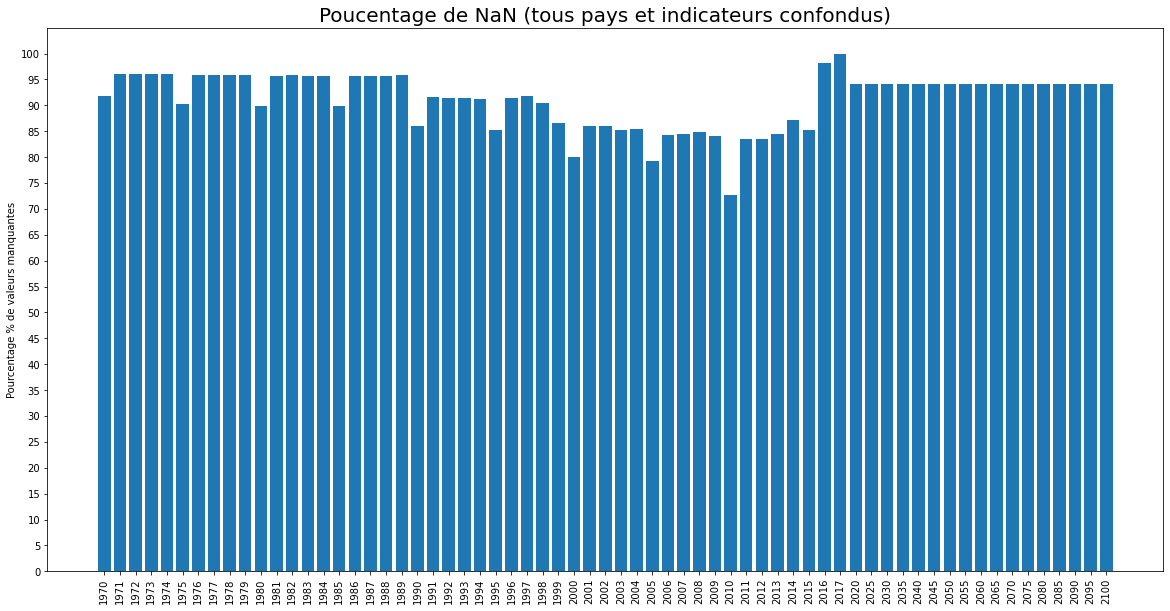

In [49]:
# Affichage du % de valeurs manquantes (tous indicateurs et tous pays confondus)
plt.figure(figsize=[20,10])
plt.title('Poucentage de NaN (tous pays et indicateurs confondus)',fontsize = 20)
valeurs_y = df_data_annee_nan.values
labels_x = df_data_annee_nan.index

plt.bar(labels_x, valeurs_y)
plt.xticks(labels_x,rotation=90)
# l'axe des ordonnées est gradué de 5 en 5
plt.yticks([0 ,5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100])
plt.ylabel("Pourcentage % de valeurs manquantes")
plt.show()

#### On remarque que la période 1990-2015 contient des données avec le moins de données manquantes. Il faut regarder la répartition des données manquantes par groupes d'indicateurs.

### 4.3.2 Premier filtrage des données: répartition des données disponibles (non NaN) par groupes d'indicateurs

#### Si on regarde la structure des codes indicateur (colonne "Indicator Code") dans la dataframe data, il est décomposé en plusieurs parties séparées par des points: le premier motif (avant le premier point) indique la catégorie à laquelle appartient l'indicateur.

#### Classification des indicateurs selon ces groupes d'inidcateurs afin de pouvoir filtrer les indicateurs.

In [50]:
# Ajout des groupes d'indicateurs dans le colonne "Categ Indic"
data_enr['Categ Indic'] = data_enr.loc[:,'Indicator Code'].apply(lambda x: x.split('.')[0])

# Remise en ordre des colonnes pour afficher la dernière colonne (colonne "Categ Indic") en premier
col_data_enr = list(data_enr.columns.values)
col_data_enr = col_data_enr[-1:]+col_data_enr[:-1]
data_enr = data_enr[col_data_enr]

# Liste des groupes d'indicateurs et nombre d'indicateurs par groupe
categ_indic = data_enr.loc[:, ['Categ Indic', 'Indicator Code']].\
    drop_duplicates().groupby('Categ Indic').count().\
   reset_index().\
    rename(columns={'Indicator Code':'Indicator Count'})

# Ajout du nombre total d'indicateurs
categ_indic.loc['Total'] = categ_indic.sum(numeric_only=True)

#Affichage des catégories d'indicateurs avec le nombre d'indicateurs par groupe
categ_indic.fillna("")

,Categ Indic,Indicator Count
0,BAR,360.00
1,HH,250.00
2,IT,2.00
3,LO,"1,046.00"
4,NY,12.00
5,OECD,16.00
6,PRJ,308.00
7,SABER,215.00
8,SE,173.00
9,SH,2.00


On retrouve bien les 3665 indicateurs.

In [51]:
# Valeurs non null par années
annee_dispo = data_enr.loc[:, '1970':'2100'].notnull()
#annee_dispo

# Ajout de la colonne des catégorie d'indicateurs
df_temp = pd.concat([data_enr[['Categ Indic']], annee_dispo], axis=1)

# Pourcentage de données disponibles dans chaque catégorie d'indicateurs
categ_indic_notnull = df_temp.groupby(['Categ Indic']).mean()

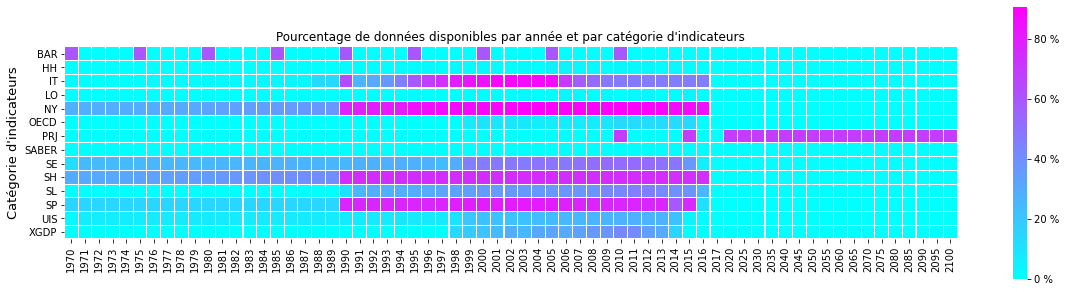

In [52]:
# Affichage du graphe heatmap des données disponibles par catégorie d'indicateurs
fig,ax = plt.subplots(1,1,figsize=(20,5))
sns.heatmap(categ_indic_notnull, square=True, linewidths=0.1, cmap="cool", ax=ax)
plt.title("Pourcentage de données disponibles par année et par catégorie d'indicateurs")
plt.ylabel('Catégorie d\'indicateurs', fontsize=13)

colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0.0,0.2,0.4,0.6,0.8])
colorbar.set_ticklabels(['0 %','20 %','40 %','60 %','80 %'])

plt.show()

#### Quand on groupe les données par catégories d'indicateurs, il est confirmé que la majorité des données disponibles concerne la plage d'années entre 1990 et 2015.

#### On voit, par ailleurs, qu'il y peu de données disponibles en 2016 et presque pas en 2017.

#### Au final, on ne gardera que les colonnes 1990 à 2015.

#### Par ailleurs, on ne selectionnera que les catégories d'indicateurs ayant le plus de données disponibles sur la période 1990-2015, à savoir:  IT, NY, SE, SH, SL, UIS, SP et XGDP.

In [53]:
# Sélection du dataframe data sur les indicateurs exploitables
group_indic = ["IT", "NY", "SE", "UIS", "SH", "SL", "SP", "XGDP"]
data_enr_filtre = data_enr[data_enr["Categ Indic"].isin(group_indic)]

# Sélection des colonnes pour années de 1900 à 2015
df_data_filtre_1990_2015 = data_enr_filtre.loc[:, '1990':'2015']

# Uniquement les variables qualitatives
df_data_filtre_qual = data_enr_filtre.loc[:, ["Categ Indic", "Topic", "Region", "Country Name", "Country Code", "Indicator Name", "Indicator Code"]]

# Concaténation des différentes dataframes
data_enr_filtre = pd.concat([df_data_filtre_qual, df_data_filtre_1990_2015], axis=1)

In [54]:
# 1er tri: nombre d'indicateurs sélectionnés
data_enr_filtre['Indicator Code'].nunique()

1470

#### A l'issue de cette 1er filtrage étape sur dataset data, nous avons un échantillon avec 40% des indicateurs totaux (3665 au total), et de nombreuses catégories d'indicateurs (colonne "Topic") ont disparu.

#### Cette colonne "Topic" correspond à  des regroupements de haut niveau (regroupements fonctionnels) réunissant un ou plusieurs catégories d'indicateurs (colonne "Categ Indic)

#### Toutefois, il est possible de réduire l'échantillon de nouveau en éliminant les regroupements fonctionnels hors du périmètre de l'étude (exemple: indicateurs sur la population d'élèves de la petite enfance ou du primaire).

### 4.3.3 Précisions sur les catégories d'indicateurs

BAR : indicateurs Barro-Lee, ensemble de données donnant une image complète de la distribution du niveau de scolarité, agrégés sur 5 ans selon 7 niveaux d'éducation, sur 144 pays à partir de 1970.

HH : indicateurs sur les enquêtes démographiques et sanitaires (DHS: Demographic and Health Surveys) et sur des indicateurs multiples  groupés (MICS: Multiple Indicator Cluster Surveys).
    
IT : indicateurs sur l'utilisation et la pénétration d'Internet et des ordinateurs dans la population (IT: Infrastructure).
        
LO : indicateurs sur l'évaluation des apprentissages en lecture, science, mathématiques,... (LO: Learning Outcomes).
    
NY : indicateurs sur les comptes nationaux, PIB, revenus par habitant. Données macro-économiques.
    
OECD : indicateurs sur les salaires des enseignants du secteur public dans l'OCDE.
    
PRJ : indicateurs à partir des projections Wittgenstein (durée de scolarisation, populations..).
    
SABER (System Approach for Better Education) : indicateurs sur l'approche systémique pour de meilleurs résultats en éducation (SABRE) aidanr la Banque Mondiale à atteindre 2 objectifs: la réforme des systèmes éducatifs au niveau des pays et la construction d'une base de connaissances de haute qualité pour les réformes de l'éducation au niveau mondial.
    
SE : indicateurs divers sur l'éducation (ES: Social Education).
    
SL : indicateurs sociaux sur la population active, sur le taux de chômage (SL: Social Labor).
    
SH (Social Health) : indicateurs sur la santé au travail (taux de mortalité, risques au travail,...).
    
SP (Social Population): indicateurs sur la population (population active,...) Social Population
    
UIS : indicateurs sur l'éducation de l'Unesco (UIS: Unesco Institute for Statistics)
    
XGDP : indicateurs sur les dépenses publiques dans l'éducation

### 4.3.4 Second filtrage: mise à l'écart des catégories métier non significatives pour l'étude

In [55]:
# Affichage des différents regroupements fonctionnels restant
data_enr_filtre['Topic'].unique()

array(['Secondary', 'Primary', nan, 'Literacy', 'Teachers', 'EMIS',
       'Expenditures', 'Background', 'Early Childhood Education',
       'Tertiary', 'Post-Secondary/Non-Tertiary',
       'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
       'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
       'Economic Policy & Debt: Purchasing power parity',
       'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
       'Pre-Primary', 'Infrastructure: Communications',
       'Social Protection & Labor: Labor force structure',
       'Health: Mortality', 'Health: Population: Dynamics', 'Population',
       'Health: Population: Structure', 'Health: Risk factors', 'Laber',
       'Education Equality', 'Attainment',
       'Social Protection & Labor: Unemployment'], dtype=object)

In [56]:
# Affichage du nombre de regroupements fonctionnels restant
data_enr_filtre['Topic'].nunique()

26

#### Il reste 26 catégories métier ou fonctionnelles d'indicateurs. Certaines catégories fonctionnelles peuvent être éliminés (Primary, Early Childhood Education, Pre-Primary) qui ne concernent pas la population visée par l'étude (lycéens et étudiants à l'université). Examinons les indicateurs de ces catégories afin de voir si on peut les éliminer.

In [57]:
liste_categ_fonct = ['Primary', 'Pre-Primary', 'Early Childhood Education']
renvoieIndByTopic(data_enr_filtre, liste_categ_fonct)

---------------------------------
Catégorie : Primary
['Adjusted net enrolment rate, primary, both sexes (%)'
 'Adjusted net enrolment rate, primary, female (%)'
 'Adjusted net enrolment rate, primary, gender parity index (GPI)'
 'Adjusted net enrolment rate, primary, male (%)'
 'Adjusted net intake rate to Grade 1 of primary education, both sexes (%)'
 'Adjusted net intake rate to Grade 1 of primary education, female (%)'
 'Adjusted net intake rate to Grade 1 of primary education, gender parity index (GPI)'
 'Adjusted net intake rate to Grade 1 of primary education, male (%)'
 'Africa Dataset: Average number of grades per multigrade class in primary schools (number of grades)'
 'Africa Dataset: Average number of pupils per mathematics textbook in Grade 1 of primary education (number)'
 'Africa Dataset: Average number of pupils per mathematics textbook in Grade 2 of primary education (number)'
 'Africa Dataset: Average number of pupils per mathematics textbook in Grade 3 of primary edu

L'examen des différents indicateurs des catégories fonctionnelles ci-dessus confirme que ces catégories peuvent être écartées de l'échantillon.

In [58]:
data_enr_filtre = data_enr_filtre.loc[~data_enr_filtre['Topic'].isin(liste_categ_fonct)]
data_enr_filtre['Indicator Code'].nunique()

1199

#### A l'issue du 2ème filtrage de l'échantillon, on travaille sur 32 % des indicateurs totaux.

### 4.3.5 Troisième filtrage: sélection de 11 indicateurs intéressants pour la problématique

In [59]:
data_enr_filtre['Categ Indic'].unique()

array(['UIS', 'SE', 'NY', 'XGDP', 'IT', 'SL', 'SH', 'SP'], dtype=object)

In [60]:
# Renvoie les indicateurs disponibles pour la catégorie d'indicateurs UIS sur le dataset data filtré
renvoieIndByCategIndic(data_enr_filtre, "UIS", "both sexes")

['Code indicateur: UIS.NERA.2 - Nom indicateur: Adjusted net enrolment rate, lower secondary, both sexes (%)']
['Code indicateur: UIS.NERA.3 - Nom indicateur: Adjusted net enrolment rate, upper secondary, both sexes (%)']
['Code indicateur: UIS.LP.AG15T99 - Nom indicateur: Adult illiterate population, 15+ years, both sexes (number)']
['Code indicateur: UIS.AFR.GTC.2.T - Nom indicateur: Africa Dataset: Graduates from accredited pre-service lower secondary teacher training programmes, both sexes (number)']
['Code indicateur: UIS.AFR.GTC.1T3.T - Nom indicateur: Africa Dataset: Graduates from accredited pre-service primary or secondary teacher training programmes, both sexes (number)']
['Code indicateur: UIS.AFR.GTC.1.T - Nom indicateur: Africa Dataset: Graduates from accredited pre-service primary teacher training programmes, both sexes (number)']
['Code indicateur: UIS.AFR.GTC.UK.T - Nom indicateur: Africa Dataset: Graduates from accredited pre-service teacher training programmes, level 

['Code indicateur: UIS.ILLPOP.AG25T64 - Nom indicateur: Illiterate population, 25-64 years, both sexes (number)']
['Code indicateur: UIS.MSEP.56 - Nom indicateur: Inbound mobility rate, both sexes (%)']
['Code indicateur: UIS.LR.AG25T64 - Nom indicateur: Literacy rate, population 25-64 years, both sexes (%)']
['Code indicateur: UIS.NER.2 - Nom indicateur: Net enrolment rate, lower secondary, both sexes (%)']
['Code indicateur: UIS.NER.3 - Nom indicateur: Net enrolment rate, upper secondary, both sexes (%)']
['Code indicateur: UIS.MENF.56 - Nom indicateur: Net flow of internationally mobile students (inbound - outbound), both sexes (number)']
['Code indicateur: UIS.MENFR.56 - Nom indicateur: Net flow ratio of internationally mobile students (inbound - outbound), both sexes (%)']
['Code indicateur: UIS.NIR.1.AGP1 - Nom indicateur: Net intake rate to Grade 1 of primary education by over-age entrants (+1 year), both sexes (%)']
['Code indicateur: UIS.NIR.1.AGM1 - Nom indicateur: Net intake

['Code indicateur: UIS.SR.2.GPV.GLAST.CP.T - Nom indicateur: Survival rate to the last grade of lower secondary general education, both sexes (%)']
['Code indicateur: UIS.T.2 - Nom indicateur: Teachers in lower secondary education, both sexes (number)']
['Code indicateur: UIS.T.4 - Nom indicateur: Teachers in post-secondary non-tertiary education, both sexes (number)']
['Code indicateur: UIS.T.23.GPV - Nom indicateur: Teachers in secondary general education, both sexes (number)']
['Code indicateur: UIS.T.23.V - Nom indicateur: Teachers in secondary vocational education, both sexes (number)']
['Code indicateur: UIS.T.5.B - Nom indicateur: Teachers in tertiary education ISCED 5 programmes, both sexes (number)']
['Code indicateur: UIS.T.3 - Nom indicateur: Teachers in upper secondary education, both sexes (number)']
['Code indicateur: UIS.MS.56.T - Nom indicateur: Total inbound internationally mobile students, both sexes (number)']
['Code indicateur: UIS.NERT.2 - Nom indicateur: Total net

In [61]:
# Renvoie les indicateurs disponibles pour la catégorie d'indicateurs UIS sur le dataset data filtré
renvoieIndByCategIndic(data_enr_filtre, "SE", "both sexes")

['Code indicateur: SE.ADT.LITR.ZS - Nom indicateur: Adult literacy rate, population 15+ years, both sexes (%)']
['Code indicateur: SE.SEC.PROG.ZS - Nom indicateur: Effective transition rate from primary to lower secondary general education, both sexes (%)']
['Code indicateur: SE.SEC.ENRL - Nom indicateur: Enrolment in secondary education, both sexes (number)']
['Code indicateur: SE.SEC.ENRL.GC - Nom indicateur: Enrolment in secondary general, both sexes (number)']
['Code indicateur: SE.SEC.ENRL.VO - Nom indicateur: Enrolment in secondary vocational, both sexes (number)']
['Code indicateur: SE.TER.ENRL - Nom indicateur: Enrolment in tertiary education, all programmes, both sexes (number)']
['Code indicateur: SE.TER.GRAD - Nom indicateur: Graduates from tertiary education, both sexes (number)']
['Code indicateur: SE.SEC.ENRR.LO - Nom indicateur: Gross enrolment ratio, lower secondary, both sexes (%)']
['Code indicateur: SE.TOT.ENRR - Nom indicateur: Gross enrolment ratio, primary to tert

In [62]:
# Renvoie les indicateurs disponibles pour la catégorie d'indicateurs NY sur le dataset data filtré
renvoieIndByCategIndic(data_enr_filtre, "NY", "none")

['Code indicateur: NY.GDP.MKTP.KD - Nom indicateur: GDP at market prices (constant 2005 US$)']
['Code indicateur: NY.GDP.MKTP.CD - Nom indicateur: GDP at market prices (current US$)']
['Code indicateur: NY.GDP.PCAP.KD - Nom indicateur: GDP per capita (constant 2005 US$)']
['Code indicateur: NY.GDP.PCAP.CD - Nom indicateur: GDP per capita (current US$)']
['Code indicateur: NY.GDP.PCAP.PP.KD - Nom indicateur: GDP per capita, PPP (constant 2011 international $)']
['Code indicateur: NY.GDP.PCAP.PP.CD - Nom indicateur: GDP per capita, PPP (current international $)']
['Code indicateur: NY.GDP.MKTP.PP.KD - Nom indicateur: GDP, PPP (constant 2011 international $)']
['Code indicateur: NY.GDP.MKTP.PP.CD - Nom indicateur: GDP, PPP (current international $)']
['Code indicateur: NY.GNP.MKTP.CD - Nom indicateur: GNI (current US$)']
['Code indicateur: NY.GNP.PCAP.CD - Nom indicateur: GNI per capita, Atlas method (current US$)']
['Code indicateur: NY.GNP.PCAP.PP.CD - Nom indicateur: GNI per capita, PP

In [63]:
# Renvoie les indicateurs disponibles pour la catégorie d'indicateurs XGDP sur le dataset data filtré
renvoieIndByCategIndic(data_enr_filtre, "XGDP", "none")

['Code indicateur: XGDP.23.FSGOV.FDINSTADM.FFD - Nom indicateur: Government expenditure in secondary institutions education as % of GDP (%)']
['Code indicateur: XGDP.56.FSGOV.FDINSTADM.FFD - Nom indicateur: Government expenditure in tertiary institutions as % of GDP (%)']


In [64]:
# Renvoie les indicateurs disponibles pour la catégorie d'indicateurs IT sur le dataset data filtré
renvoieIndByCategIndic(data_enr_filtre, "IT", "none")

['Code indicateur: IT.NET.USER.P2 - Nom indicateur: Internet users (per 100 people)']
['Code indicateur: IT.CMP.PCMP.P2 - Nom indicateur: Personal computers (per 100 people)']


In [65]:
# Renvoie les indicateurs disponibles pour la catégorie d'indicateurs SL sur le dataset data filtré
renvoieIndByCategIndic(data_enr_filtre, "SL", "none")

['Code indicateur: SL.TLF.ADVN.ZS - Nom indicateur: Labor force with advanced education (% of total)']
['Code indicateur: SL.TLF.ADVN.FE.ZS - Nom indicateur: Labor force with advanced education, female (% of female labor force)']
['Code indicateur: SL.TLF.ADVN.MA.ZS - Nom indicateur: Labor force with advanced education, male (% of male labor force)']
['Code indicateur: SL.TLF.BASC.ZS - Nom indicateur: Labor force with basic education (% of total)']
['Code indicateur: SL.TLF.BASC.FE.ZS - Nom indicateur: Labor force with basic education, female (% of female labor force)']
['Code indicateur: SL.TLF.BASC.MA.ZS - Nom indicateur: Labor force with basic education, male (% of male labor force)']
['Code indicateur: SL.TLF.INTM.ZS - Nom indicateur: Labor force with intermediate education (% of total)']
['Code indicateur: SL.TLF.INTM.FE.ZS - Nom indicateur: Labor force with intermediate education, female (% of female labor force)']
['Code indicateur: SL.TLF.INTM.MA.ZS - Nom indicateur: Labor forc

In [66]:
# Renvoie les indicateurs disponibles pour la catégorie d'indicateurs SL sur le dataset data filtré
renvoieIndByCategIndic(data_enr_filtre, "SH", "none")

['Code indicateur: SH.DYN.MORT - Nom indicateur: Mortality rate, under-5 (per 1,000)']
['Code indicateur: SH.DYN.AIDS.ZS - Nom indicateur: Prevalence of HIV, total (% of population ages 15-49)']


In [67]:
# Renvoie les indicateurs disponibles pour la catégorie d'indicateurs SL sur le dataset data filtré
renvoieIndByCategIndic(data_enr_filtre, "SP", "both sexes")

['Code indicateur: SP.SEC.LTOT.IN - Nom indicateur: Population of the official age for lower secondary education, both sexes (number)']
['Code indicateur: SP.PRE.TOTL.IN - Nom indicateur: Population of the official age for pre-primary education, both sexes (number)']
['Code indicateur: SP.PRM.TOTL.IN - Nom indicateur: Population of the official age for primary education, both sexes (number)']
['Code indicateur: SP.SEC.TOTL.IN - Nom indicateur: Population of the official age for secondary education, both sexes (number)']
['Code indicateur: SP.TER.TOTL.IN - Nom indicateur: Population of the official age for tertiary education, both sexes (number)']
['Code indicateur: SP.PRM.GRAD.TO - Nom indicateur: Population of the official age for the last grade of primary education, both sexes (number)']
['Code indicateur: SP.SEC.UTOT.IN - Nom indicateur: Population of the official age for upper secondary education, both sexes (number)']


#### Au 3ème filtrage, on peut écarter les catégories d'indicateurs commençant pas SH et SL qui ne correspondent pas à notre sujet d'étude.

#### Finalement, 11 indicateurs sont retenus à l'issue de de 3ème filtrage.

### 4.3.6 Liste des 11 indicateurs retenus à l'issue des différents sous-échantillonnages

Sélection d'indicateurs intéressants pour la problématique de l'étude dans les catégories d'indicateurs (colonne "Categ Indic"). Catégories (categ indic) retenues pour l'étude:
  * IT pour indicateurs sur l'utilisation et la pénétration d'Internet et des ordinateurs dans la population
       *  Code indicateur: IT.NET.USER.P2 - Nom indicateur: Internet users (per 100 people)
       *  Code indicateur: IT.CMP.PCMP.P2 - Nom indicateur: Personal computers (per 100 people)
       
       
  * NY indicateurs sur les comptes nationaux, PIB, revenus par habitant. Données macro-économiques
      *  Code indicateur: NY.GDP.PCAP.CD - Nom indicateur: GDP per capita (current US$)
      
      *
  * XGDP indicateurs sur les dépenses publiques dans l'éducation
       * Code indicateur: XGDP.23.FSGOV.FDINSTADM.FFD - Nom indicateur: Government expenditure in secondary institutions education as % of GDP (%)
       * Code indicateur: XGDP.56.FSGOV.FDINSTADM.FFD - Nom indicateur: Government expenditure in tertiary institutions as % of GDP (%)
       
       
  * SE/UIS indicateurs divers sur l'éducation
       *  Code indicateur: SE.TER.ENRR - Nom indicateur: Gross enrolment ratio, tertiary, both sexes (%)
       *  Code indicateur: SE.SEC.ENRR.UP - Nom indicateur: Gross enrolment ratio, upper secondary, both sexes (%)
       *  Code indicateur: SE.ADT.1524.LT.ZS - Nom indicateur: Youth literacy rate, population 15-24 years, both sexes (%)
       *  Code indicateur: UIS.NER.3 - Nom indicateur: Net enrolment rate, upper secondary, both sexes (%)
       
       
   * SP pour les données sur la population
       * Code indicateur: SP.TER.TOTL.IN - Nom indicateur: Population of the official age for tertiary education, both sexes (number)
       * Code indicateur: SP.SEC.UTOT.IN - Nom indicateur: Population of the official age for upper secondary education, both sexes (number)'
  
#### Cette sélection d'indicateurs va être affinée ensuite par rapport à la qualité des données (taux de valeurs manquantes,distribution, outliers, ...).

In [68]:
# On filtre le dataset sur ces 11 indicateurs
data_enr_filtre_ana = data_enr_filtre.loc[data_enr_filtre['Indicator Code'].isin(['IT.NET.USER.P2','IT.CMP.PCMP.P2',\
                                                                                 'NY.GDP.PCAP.CD','XGDP.23.FSGOV.FDINSTADM.FFD',\
                                                                                  'XGDP.56.FSGOV.FDINSTADM.FFD',\
                                                                                  'SE.TER.ENRR','SE.SEC.ENRR.UP','SE.ADT.1524.LT.ZS',\
                                                                                  'UIS.NER.3','SP.TER.TOTL.IN',\
                                                                                 'SP.SEC.UTOT.IN'])]


### 4.3.7 4ème filtrage : mise à l'écart des pays avec moins de 50 % de données disponibles sur ces indicateurs

#### Il existe des regroupements de pays présents dans la colonne "Country Name" du dataset data, qui ne correspondent pas à des pays. Ainsi, les 25 premières lignes de cette colonne correspondent aux zones géographiques, le reste correspond à la liste des pays.

#### 4.3.7.1 Sélection des pays uniquement

In [69]:
pays = data_enr_filtre_ana["Country Name"].drop_duplicates()
print(pays.head(30))

1245                                              Arab World
4910                                     East Asia & Pacific
8575             East Asia & Pacific (excluding high income)
12240                                              Euro area
15905                                  Europe & Central Asia
19570          Europe & Central Asia (excluding high income)
23235                                         European Union
26900                 Heavily indebted poor countries (HIPC)
30565                                            High income
34230                              Latin America & Caribbean
37895      Latin America & Caribbean (excluding high income)
41560           Least developed countries: UN classification
45225                                    Low & middle income
48890                                             Low income
52555                                    Lower middle income
56220                             Middle East & North Africa
59885     Middle East & 

In [70]:
pays = data_enr_filtre_ana["Country Name"].drop_duplicates()[25:].values
data_enr_filtre_ana = data_enr_filtre_ana[data_enr_filtre_ana["Country Name"].isin(pays)]

#### 4.3.7.2 Calcul des doublons sur le dataset data cible

In [71]:
# Recupération de données duppliquées
data_enr_filtre_ana[data_enr_filtre_ana.duplicated()]

,Categ Indic,Topic,Region,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015


**Il n'y a pas de doublon dans le dataset data cible.**

#### 4.3.7.3 Calcul du taux de Nan moyen par pays sur le différents indicateurs sur la période 1990-2015

In [72]:
# Fonction qui calcul % de valeurs manquantes pour un indicateur donné pourl'ensemble des pays sur la plage de données 1990-2015
def renvoieTauxNaNparPays(dfdata,indic):
    data_ind = dfdata[dfdata["Indicator Code"] == indic]
    li_annees = dfdata.columns[7:33]
    data_pays_nan_series = (1 - data_ind.groupby(['Country Name'])[li_annees].count().sum(axis=1)/len(li_annees))*100

    data_pays_nan = data_pays_nan_series.to_frame()
    data_pays_nan.columns= ['taux_nan'+indic]
   
    return data_pays_nan

In [73]:
# Indicateur IT.NET.USER.P2
indicator_code_it1 = 'IT.NET.USER.P2'
df_data_nan_id_it1 = renvoieTauxNaNparPays(data_enr_filtre_ana,indicator_code_it1)

# Indicateur IT.CMP.PCMP.P2
indicator_code_it2 = 'IT.CMP.PCMP.P2'
df_data_nan_id_it2 = renvoieTauxNaNparPays(data_enr_filtre_ana,indicator_code_it2)

# Indicateur 'NY.GDP.PCAP.CD'
indicator_code_ny = 'NY.GDP.PCAP.CD'
df_data_nan_id_ny = renvoieTauxNaNparPays(data_enr_filtre_ana,indicator_code_ny)

# Indicateur 'XGDP.23.FSGOV.FDINSTADM.FFD'
indicator_code_xgdp1 = 'XGDP.23.FSGOV.FDINSTADM.FFD'
df_data_nan_id_xgdp1 = renvoieTauxNaNparPays(data_enr_filtre_ana,indicator_code_xgdp1)

# Indicateur 'XGDP.56.FSGOV.FDINSTADM.FFD'
indicator_code_xgdp2 = 'XGDP.56.FSGOV.FDINSTADM.FFD'
df_data_nan_id_xgdp2 = renvoieTauxNaNparPays(data_enr_filtre_ana,indicator_code_xgdp2)

# Indicateur 'SE.TER.ENRR'
indicator_code_se1 = 'SE.TER.ENRR'
df_data_nan_id_se1 = renvoieTauxNaNparPays(data_enr_filtre_ana,indicator_code_se1)

# Indicateur 'SE.SEC.ENRR.UP'
indicator_code_se2= 'SE.SEC.ENRR.UP'
df_data_nan_id_se2 = renvoieTauxNaNparPays(data_enr_filtre_ana,indicator_code_se2)

# Indicateur 'SE.ADT.1524.LT.ZS'
indicator_code_se3 = 'SE.ADT.1524.LT.ZS'
df_data_nan_id_se3 = renvoieTauxNaNparPays(data_enr_filtre_ana,indicator_code_se2)

# Indicateur 'UIS.NER.3'
indicator_code_uis = 'UIS.NER.3'
df_data_nan_id_uis = renvoieTauxNaNparPays(data_enr_filtre_ana,indicator_code_uis)

# Indicateur 'SP.TER.TOTL.IN'
indicator_code_pop1 = 'SP.TER.TOTL.IN'
df_data_nan_id_pop1 = renvoieTauxNaNparPays(data_enr_filtre_ana,indicator_code_pop1)

# Indicateur 'SP.SEC.UTOT.IN'
indicator_code_pop2 = 'SP.SEC.UTOT.IN'
df_data_nan_id_pop2 = renvoieTauxNaNparPays(data_enr_filtre_ana,indicator_code_pop2)

#### 4.3.7.4  Filtrage des pays avec un ratio moyen de NaN <=  50% sur l'ensemble des 11 indicateurs 

In [74]:
# Calcul d'un ratio moyen de Nan par pays sur les 11 indicateurs sélectionnés
# Récupération des pays avec un taux de NaN < 50 % dans un liste
data_nan_tot = pd.concat([df_data_nan_id_it1, df_data_nan_id_it2,df_data_nan_id_ny,df_data_nan_id_xgdp1,\
                          df_data_nan_id_xgdp2, df_data_nan_id_se1,df_data_nan_id_se2,df_data_nan_id_se3,\
                         df_data_nan_id_uis,df_data_nan_id_pop1,df_data_nan_id_pop2], axis=1)
moyenne_taux_nan = data_nan_tot.mean(axis=1).sort_values(ascending=True)
df_moyenne_taux_nan = moyenne_taux_nan.to_frame()
df_moyenne_taux_nan.columns = ['moy_tx_nan']
df_moyenne_taux_nan_inf_50 = df_moyenne_taux_nan.loc[df_moyenne_taux_nan['moy_tx_nan'] <= 50]
df_moyenne_taux_nan_inf_50 = df_moyenne_taux_nan_inf_50['moy_tx_nan'].index.tolist()
df_moyenne_taux_nan_inf_50

['Sweden',
 'Switzerland',
 'Spain',
 'Hungary',
 'Portugal',
 'Ireland',
 'Netherlands',
 'New Zealand',
 'Denmark',
 'Finland',
 'United Kingdom',
 'Austria',
 'France',
 'Korea, Rep.',
 'United States',
 'Czech Republic',
 'Norway',
 'Italy',
 'Mexico',
 'Latvia',
 'Colombia',
 'Bulgaria',
 'Argentina',
 'Belgium',
 'Japan',
 'Israel',
 'Cyprus',
 'Slovak Republic',
 'Romania',
 'Chile',
 'Australia',
 'Cuba',
 'India',
 'Poland',
 'Mauritius',
 'Estonia',
 'Hong Kong SAR, China',
 'Malaysia',
 'Tunisia',
 'Thailand',
 'Greece',
 'Indonesia',
 'Peru',
 'Iceland',
 'Lithuania',
 'Slovenia',
 'El Salvador',
 'Iran, Islamic Rep.',
 'Moldova',
 'Mongolia',
 'Germany',
 'Burkina Faso',
 'Nepal',
 'Costa Rica',
 'Malta',
 'Turkey',
 'Barbados',
 'Jamaica',
 'Croatia',
 'Morocco',
 'Ghana',
 'Macao SAR, China',
 'Lebanon',
 'Bolivia',
 'Syrian Arab Republic',
 'Bangladesh',
 'Ukraine',
 'Uruguay',
 'Guatemala',
 'Panama',
 'South Africa',
 'Philippines',
 'Mozambique',
 'Burundi',
 'Niger'

#### Récupération d'une liste de pays

#### La valeur de 50 % (de données disponibles) a été choisie pour garder un échantillon homogène des pays couvrant les différentes régions géographiques et mélangeant des petits/grands pays en termes de population.

In [75]:
list_pays = ['Sweden',
 'Switzerland',
 'Spain',
 'Hungary',
 'Portugal',
 'Ireland',
 'Netherlands',
 'New Zealand',
 'Denmark',
 'Finland',
 'United Kingdom',
 'Austria',
 'France',
 'Korea, Rep.',
 'United States',
 'Czech Republic',
 'Norway',
 'Italy',
 'Mexico',
 'Latvia',
 'Colombia',
 'Bulgaria',
 'Argentina',
 'Belgium',
 'Japan',
 'Israel',
 'Cyprus',
 'Slovak Republic',
 'Romania',
 'Chile',
 'Australia',
 'Cuba',
 'India',
 'Poland',
 'Mauritius',
 'Estonia',
 'Hong Kong SAR, China',
 'Malaysia',
 'Tunisia',
 'Thailand',
 'Greece',
 'Indonesia',
 'Peru',
 'Iceland',
 'Lithuania',
 'Slovenia',
 'El Salvador',
 'Iran, Islamic Rep.',
 'Moldova',
 'Mongolia',
 'Germany',
 'Burkina Faso',
 'Nepal',
 'Costa Rica',
 'Malta',
 'Turkey',
 'Barbados',
 'Jamaica',
 'Croatia',
 'Morocco',
 'Ghana',
 'Macao SAR, China',
 'Lebanon',
 'Bolivia',
 'Syrian Arab Republic',
 'Bangladesh',
 'Ukraine',
 'Uruguay',
 'Guatemala',
 'Panama',
 'South Africa',
 'Philippines',
 'Mozambique',
 'Burundi',
 'Niger',
 'Russian Federation',
 'Lao PDR',
 'Bahrain',
 'Brunei Darussalam',
 'Belize',
 'Swaziland',
 'Venezuela, RB',
 'Armenia',
 'Mauritania',
 'Malawi',
 'China',
 'Albania',
 'Kyrgyz Republic',
 'Kuwait',
 'St. Lucia',
 'Ecuador',
 'Jordan',
 'Ethiopia',
 'Algeria',
 'Paraguay',
 'Luxembourg',
 'Mali',
 'Cabo Verde',
 'Benin',
 'Guinea',
 'Qatar',
 'Botswana',
 'Macedonia, FYR',
 'Djibouti',
 'Tajikistan',
 'Canada',
 'Oman',
 'Lesotho',
 'Rwanda',
 'West Bank and Gaza',
 'Togo',
 'Eritrea',
 'Cameroon',
 'Georgia',
 'Dominican Republic',
 'Namibia',
 'Egypt, Arab Rep.',
 'Cambodia',
 'Madagascar',
 'Brazil',
 'Chad',
 'Bhutan',
 'Aruba',
 'Pakistan',
 'Belarus',
 'Uzbekistan',
 'St. Vincent and the Grenadines',
 'Seychelles',
 'Saudi Arabia',
 'Dominica',
 'Senegal',
 'Serbia',
 'Kenya',
 'Honduras',
 'Samoa',
 'Kazakhstan',
 'Guyana',
 'Gambia, The',
 'Bermuda',
 'Nicaragua',
 'St. Kitts and Nevis',
 'Angola',
 'Fiji',
 'Nigeria',
 'Yemen, Rep.',
 'Zimbabwe',
 'Comoros',
 'Azerbaijan',
 'Uganda']
len(list_pays)

data_enr_filtre_ana_pays = data_enr_filtre_ana[data_enr_filtre_ana["Country Name"].isin(list_pays)]
data_enr_filtre_ana_pays["Country Name"].nunique()

149

#### On retient 149 pays sur 242.

#### 4.3.7.5 Calcul du pourcentage de données disponibles pour chaque indicateur (sur la sélection des pays)

In [76]:
# Pourcentage de données disponibles dans chaque indicateur retenu sur la sélection des pays
indic_ret_notnull = data_enr_filtre_ana_pays.groupby(['Indicator Code']).count()/data_enr_filtre_ana_pays["Country Code"].nunique()
indic_ret_notnull.drop(['Categ Indic', 'Topic', 'Region', 'Country Name', 'Country Code', 'Indicator Name'], axis=1, inplace=True)

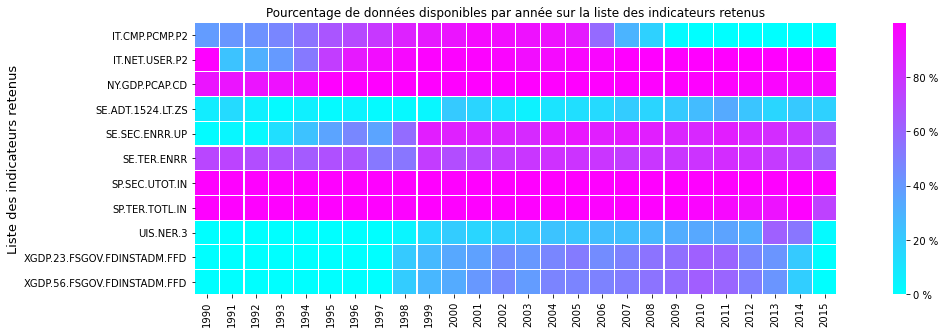

In [77]:
# Affichage du graphe heatmap du pourcentage de données disponibles pour les indicateurs retenus sur la période 1990-2015
fig,ax = plt.subplots(1,1,figsize=(20,5))
sns.heatmap(indic_ret_notnull, square=True, linewidths=0.1, cmap="cool", ax=ax)
plt.title("Pourcentage de données disponibles par année sur la liste des indicateurs retenus")
plt.ylabel('Liste des indicateurs retenus', fontsize=13)
plt.xticks(rotation=90)

colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0.0,0.2,0.4,0.6,0.8])
colorbar.set_ticklabels(['0 %','20 %','40 %','60 %','80 %'])

plt.show()

#### Les indicateurs SE.ADT.1524.LT.ZS et UIS.NER.3 ne sont pas retenus car il y a trop peu de données disponibles sur la période 1990-2015 (pas plus de 25 % de données disponibles).

#### De la même manière l'indicateur IT.CMP.PCMP.P2 contient trop peu de données disponibles à partir de 2007 jusqu'à 2015 (de 0 à 40 % de données disponibles). Il n'est pas retenu pour établir un score sur les années 2010-2015.

### 4.3.8 5ème filtrage: analyse de la qualité des données (distribution, calcul indicateurs statisitiques) sur les indicateurs retenus

#### 4.3.8.1 Analyse de la distribution et calcul de la moyenne, écart-type et médiane pour chaque indicateur

In [78]:
# Affichage des histogramme de distribution des données et bopxplot et calcul moyenne, écart-type et médiane
def calcIndStatsGraph(dfIn, nomindic, nbrebar, list_xticks):
    df_it = dfIn[dfIn["Indicator Name"] == nomindic]
    li_annees = df_it.columns[7:33]
    df_it2 = df_it.groupby(['Indicator Code'])[li_annees].count().sum(axis=0)
    
    # Affichage histogramme distribution des données pour l'indicateur sur la période 1990-2015
    df_it_1990_2015= df_it.loc[:, "1990":"2015"]
    array_it = np.empty((0,10))
    for year in df_it_1990_2015.columns:
        array_it_temp = df_it_1990_2015[[year]].values
        array_it = np.append(array_it, array_it_temp)

    fig = plt.figure(1, figsize=(20,15))
    plt.subplot(221)
    plt.hist(array_it,nbrebar ,edgecolor = 'white')
    plt.xticks(list_xticks)
    plt.xticks(rotation=90)
    plt.xlabel('Valeurs de l\'indicateur')
    plt.ylabel('Fréquence')
    plt.title('Distribution de l\'indicateur sur la période 1990-2015, tous pays confondus')
    
    # Affichage distribution des données de l'indicateur par année
    plt.subplot(222)
    plt.bar(df_it2.index,df_it2.values)
    plt.xticks(rotation=90)
    plt.xlabel('Année')
    plt.ylabel('Fréquence')
    plt.title('Répartition des données par année (sur période 1990-2015), tous pays confondus')
   

    # Affichage boite à moustaches pour l'inicateur sur la période 1990-2015

    plt.subplot(223)
    sns.boxplot(data=array_it)
    plt.title("Distribution des données pour l'indicateur " + nomindic)
    plt.xticks([0],[nomindic])
    plt.ylabel('Valeurs de l\'indicateur')
    
   # plt.style.use('ggplot')
    plt.show()
    
    print('--------------------------')
    print('moyenne pour ' + nomindic)
    print(np.nanmean(array_it))
    print('')
    print('--------------------------')
    print('écart-type pour ' + nomindic)
    print(np.nanstd(array_it))
    print('')
    print('--------------------------')
    print('médiane pour ' + nomindic)
    print(np.nanmedian(array_it))
    
    return None

In [79]:
# Affichage séries temporelles pour chaque indicateur en affichant les 10 pays ayant les plus importantes valeurs pour cet indicateur
# sur la période 1990-2015
def GraphSerieTempIndic(dfIn, nomindic):
    df_it = dfIn[dfIn["Indicator Name"] == nomindic]
    df_it["mean_1990_2015"] = df_it.loc[:, "1990":"2015"].mean(axis=1)
    df_it_fil = df_it.sort_values(by='mean_1990_2015', ascending=False)[0:10]
    df_it_fil.drop(['mean_1990_2015'], axis=1, inplace=True)
    fig = plt.figure(3, figsize=(20,10))
    series = df_it_fil.groupby("Country Name").mean()

    for pays in series.index :
        plt.plot(series.loc[pays, :], label=pays)
        plt.xticks(rotation=60)
    plt.title(nomindic + ' - 10 pays avant les valeurs les plus importantes')
    plt.ylabel(nomindic)
    plt.legend()
    plt.show()
    
    return None

### Indicateur "Internet users (per 100 people)"

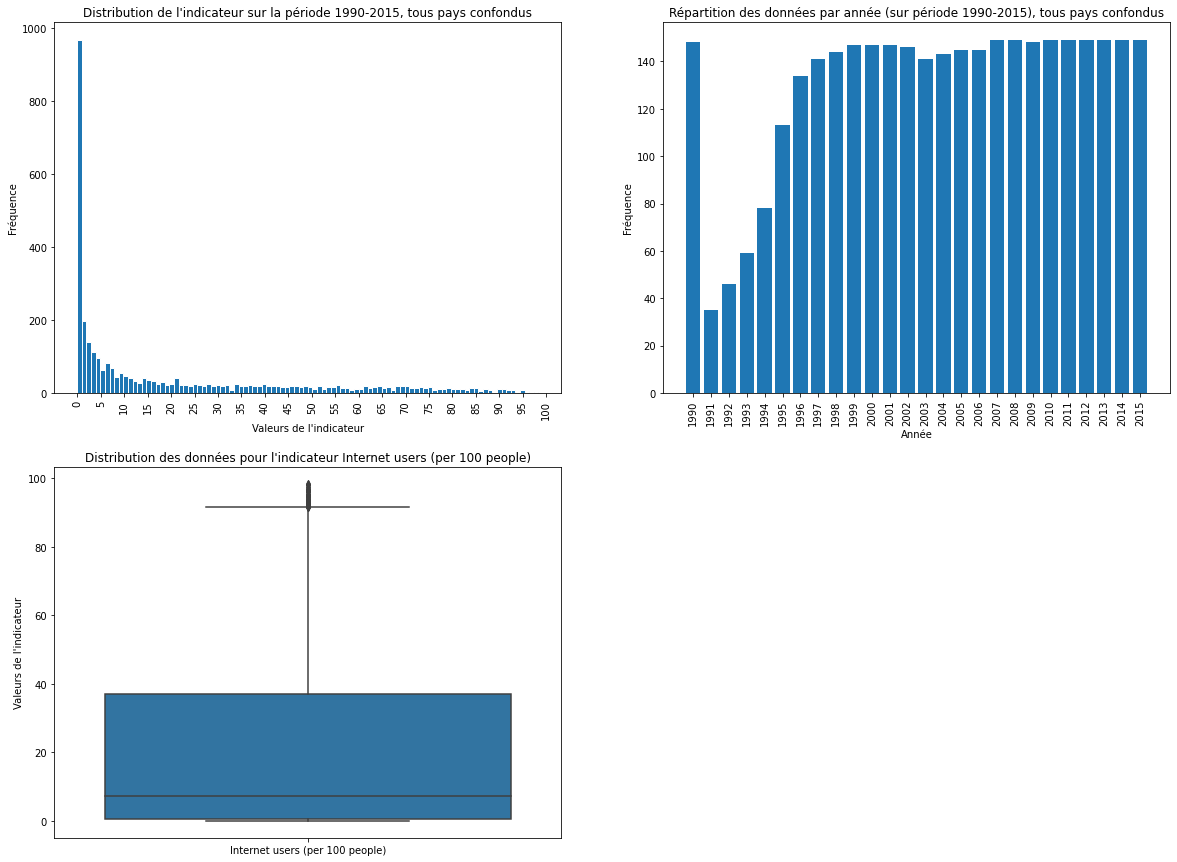

--------------------------
moyenne pour Internet users (per 100 people)
21.388871848081198

--------------------------
écart-type pour Internet users (per 100 people)
26.6965192888687

--------------------------
médiane pour Internet users (per 100 people)
7.388923711


In [80]:
#Calcul distribution, moyenne,écart-type, médiane et affichage graphes (distribution de données et boxplot)
list_xticks = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
calcIndStatsGraph(data_enr_filtre_ana_pays, 'Internet users (per 100 people)',100, list_xticks)

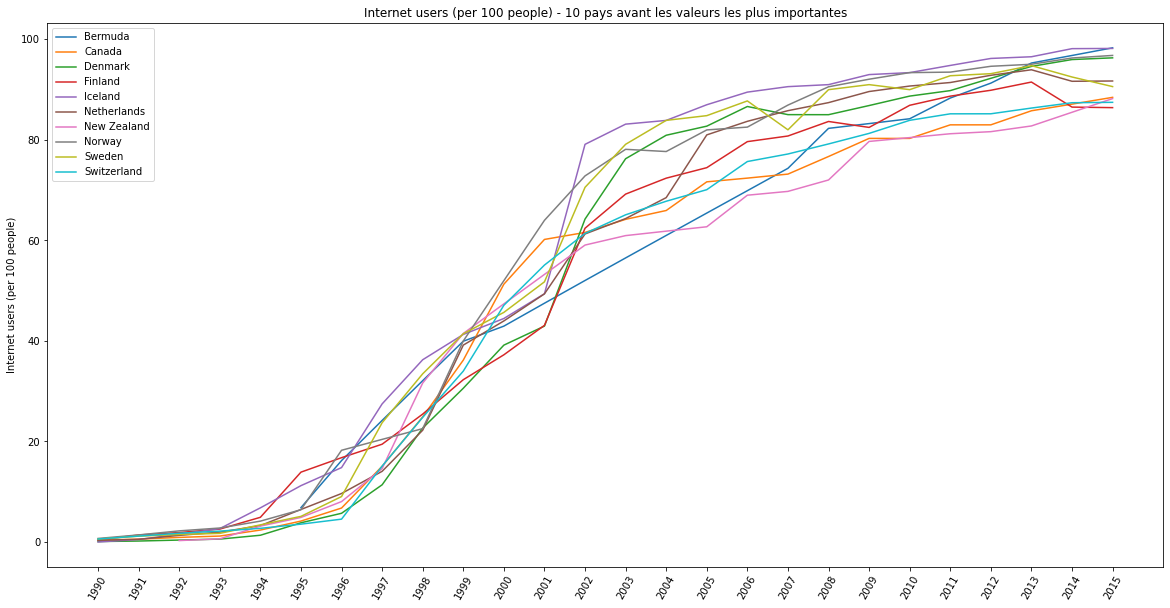

In [81]:
# Affichage graphe séries temporelles pour chaque indicateur pour les 10 premiers pays ayant un moyenne la plus élevée sur la période 1990-2015 
GraphSerieTempIndic(data_enr_filtre_ana_pays, 'Internet users (per 100 people)')

#### Distribution asymétrique à droite (moyenne > médiane) de la distribution des valeurs de l’indicateur tous pays et année confondus,  sur la période 1990-2015 : il y a beaucoup de pays avec un taux de couverture Internet faible et quelques pays (Etats-Unis,…) avec un très bonne infrastructure Internet. 

#### Répartition des données de l’indicateur sur toutes les années de la période, pas de trous dans les séries temporelles.

#### Ecart-type important,ce qui indique des disparités importantes entre les différents pays sur la couverture Internet et présence d’outliers « explicables » en haut du spectre des valeurs avec des pays ayant des forts taux de couverture ( > à 90%).

#### => l'indicateur est retenu pour l'étude

### Indicateur "GDP per capita (current US$)"

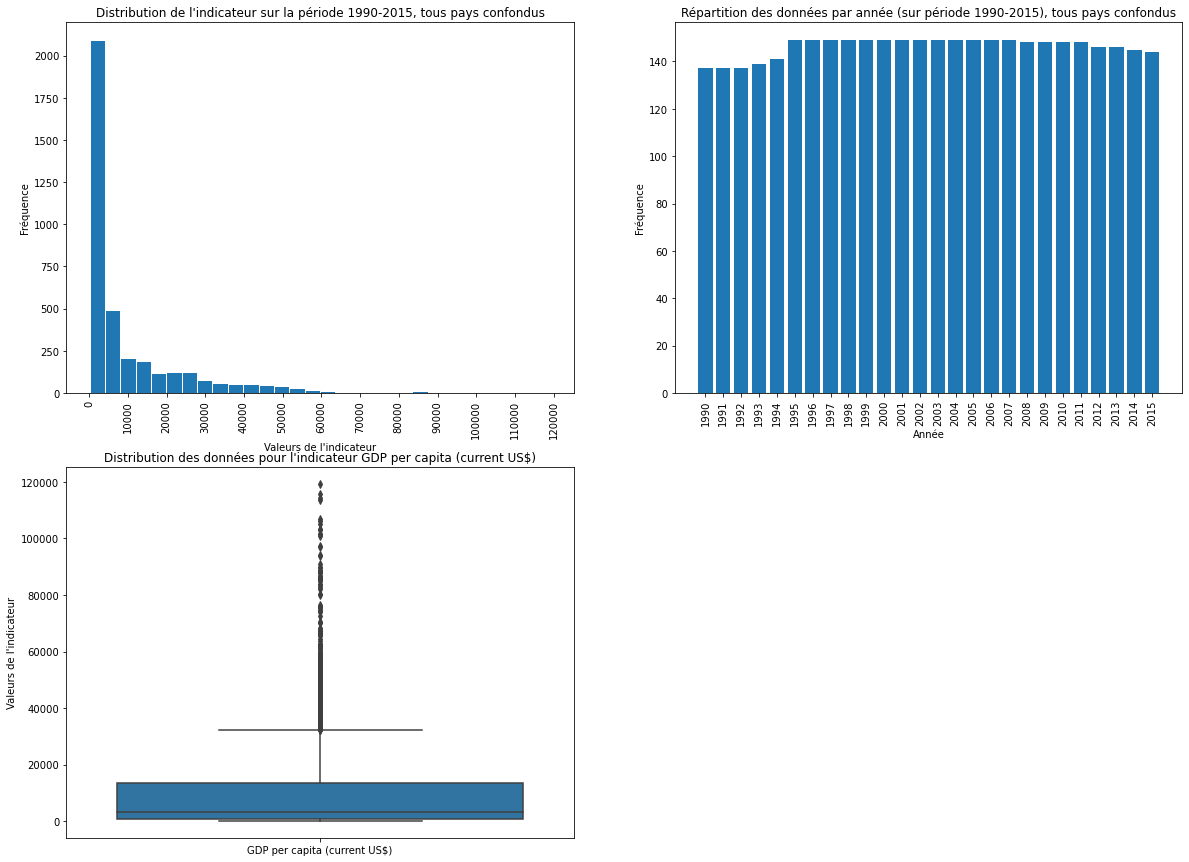

--------------------------
moyenne pour GDP per capita (current US$)
10528.683006419522

--------------------------
écart-type pour GDP per capita (current US$)
16221.845694078585

--------------------------
médiane pour GDP per capita (current US$)
3338.5962740685804


In [82]:
#Calcul moyenne,écart-type, médiane et affichage graphes (distribution de données et boxplot)
list_xticks = [0,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,110000,120000]
calcIndStatsGraph(data_enr_filtre_ana_pays, 'GDP per capita (current US$)',30,list_xticks)

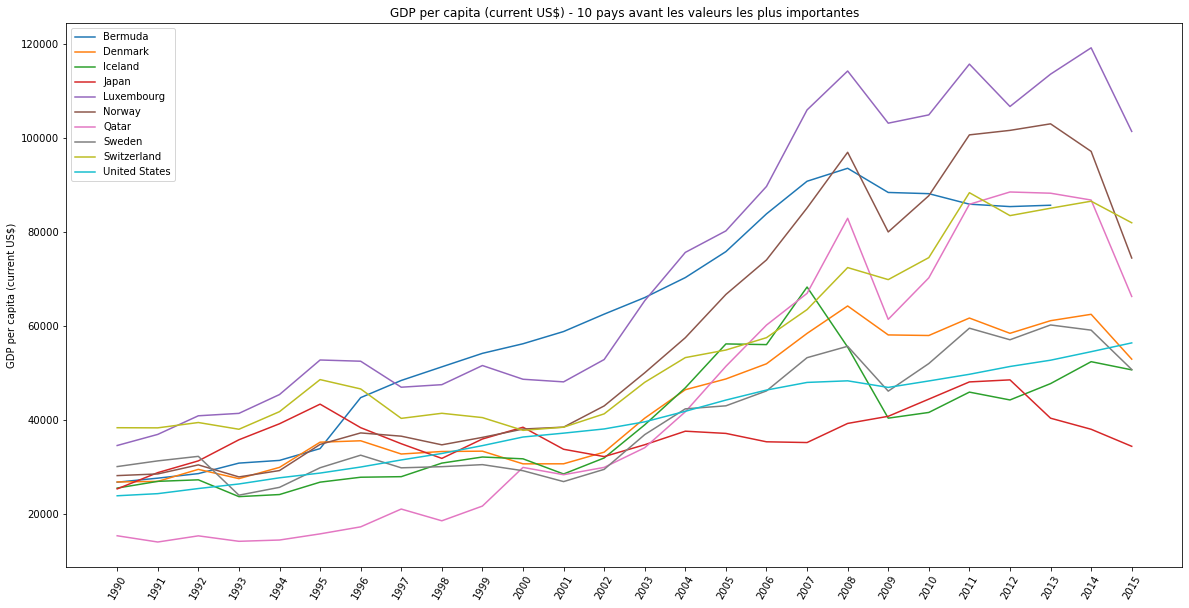

In [83]:
# Affichage graphe séries temporelles pour chaque indicateur pour les 10 premiers pays ayant un moyenne la plus élevée sur la période 1990-2015 
GraphSerieTempIndic(data_enr_filtre_ana_pays, 'GDP per capita (current US$)')

#### Distribution asymétrique à droite (moyenne > médiane) de la distribution des valeurs de l’indicateur tous pays et année confondus,  sur la période 1990-2015 : il y a beaucoup de pays avec des revenus par habitant faibles et quelques pays (Luxembourg, Norvège…) avec des revenus par habitant très important. 

#### Répartition homogène des données de l’indicateur sur toutes les années de la période, pas de trous dans les séries temporelles.

#### Ecart-type important,ce qui indique des disparités importantes entre les différents pays pour cet indicateur et présence d’outliers « explicables » pour les pays riches (voir slide sur les séries temporelles). 

#### => l'indicateur est retenu dans le cadre de l'étude.

### Indicateur "Government expenditure in secondary institutions education as % of GDP (%)"

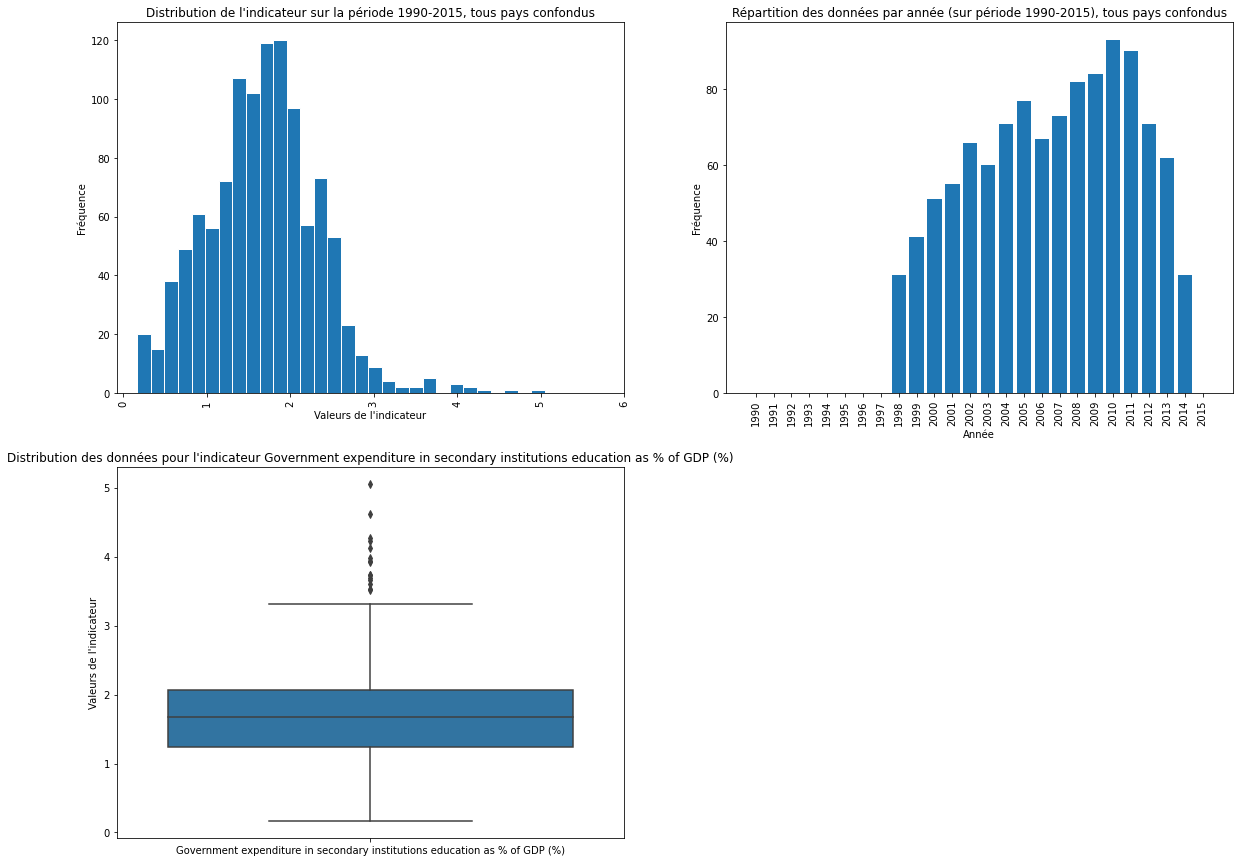

--------------------------
moyenne pour Government expenditure in secondary institutions education as % of GDP (%)
1.6707860825827758

--------------------------
écart-type pour Government expenditure in secondary institutions education as % of GDP (%)
0.6722277365127877

--------------------------
médiane pour Government expenditure in secondary institutions education as % of GDP (%)
1.67496001720428


In [84]:
#Calcul moyenne,écart-type, médiane et affichage graphes (distribution de données et boxplot)
list_xticks = [0,1,2,3,4,5,6]
calcIndStatsGraph(data_enr_filtre_ana_pays, 'Government expenditure in secondary institutions education as % of GDP (%)',30,list_xticks)

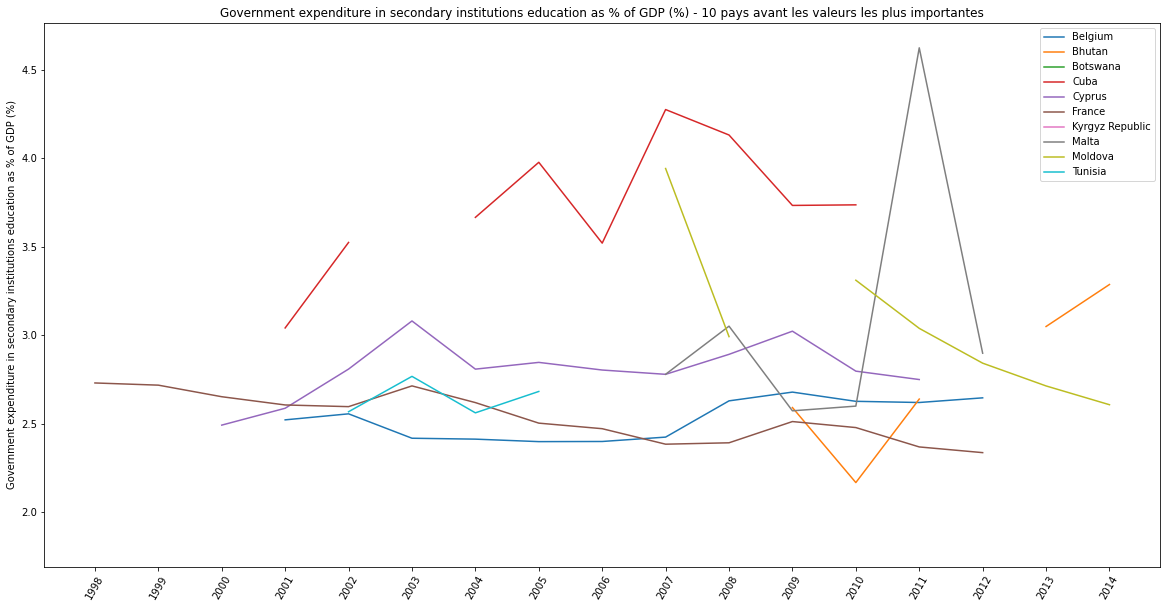

In [85]:
# Affichage graphe séries temporelles pour chaque indicateur pour les 10 premiers pays ayant un moyenne la plus élevée sur la période 1990-2015 
GraphSerieTempIndic(data_enr_filtre_ana_pays, 'Government expenditure in secondary institutions education as % of GDP (%)')

### Indicateur "Government expenditure in tertiary institutions as % of GDP (%)"

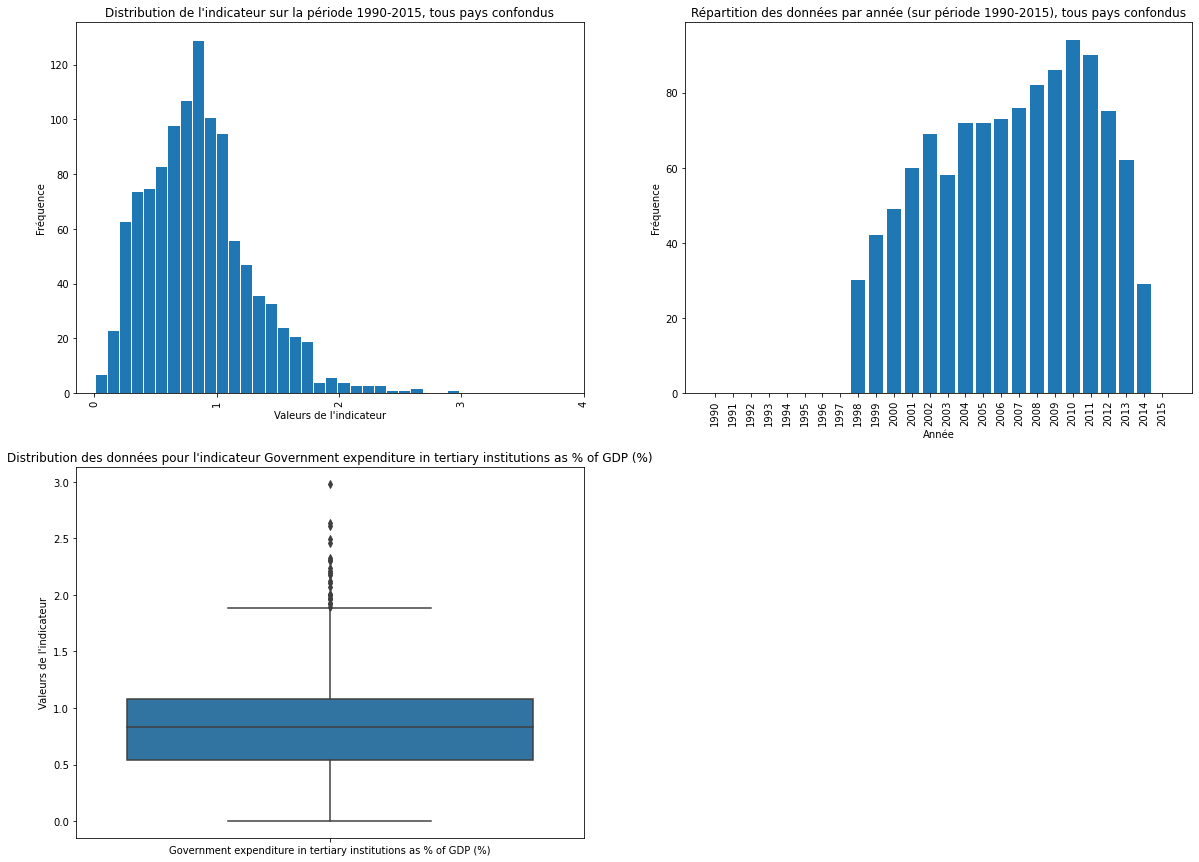

--------------------------
moyenne pour Government expenditure in tertiary institutions as % of GDP (%)
0.8534040394850021

--------------------------
écart-type pour Government expenditure in tertiary institutions as % of GDP (%)
0.4306987343077862

--------------------------
médiane pour Government expenditure in tertiary institutions as % of GDP (%)
0.8315600156784059


In [86]:
#Calcul moyenne,écart-type, médiane et affichage graphes (distribution de données et boxplot)
list_xticks = [0,1,2,3,4]
calcIndStatsGraph(data_enr_filtre_ana_pays, 'Government expenditure in tertiary institutions as % of GDP (%)',30,list_xticks)

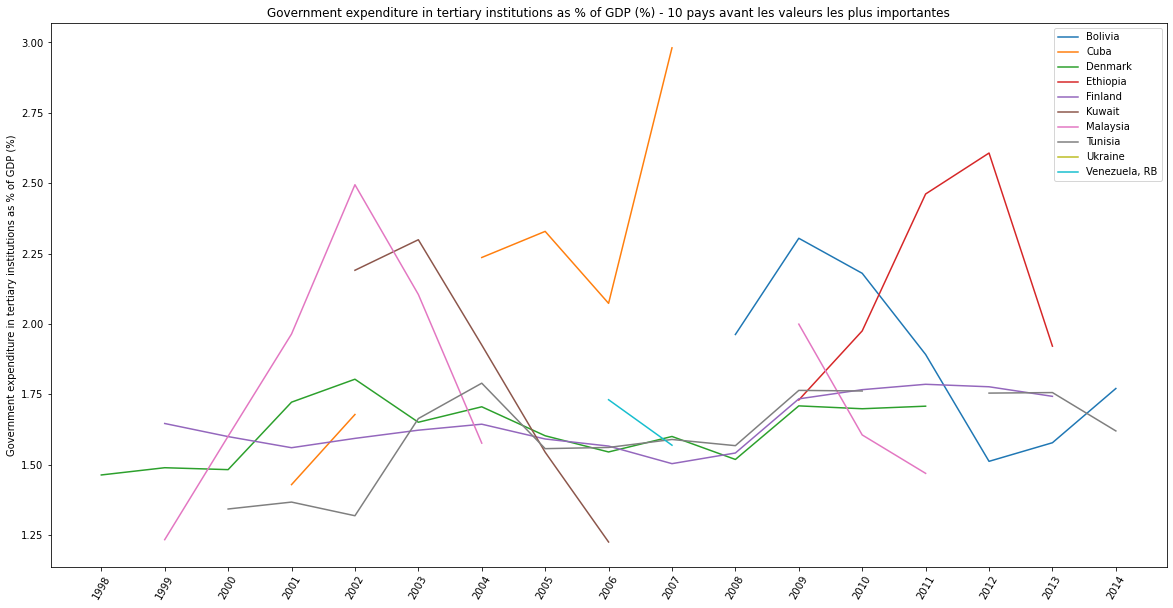

In [87]:
# Affichage graphe séries temporelles pour chaque indicateur pour les 10 premiers pays ayant un moyenne la plus élevée sur la période 1990-2015 
GraphSerieTempIndic(data_enr_filtre_ana_pays, 'Government expenditure in tertiary institutions as % of GDP (%)')

#### Distribution relativement symétrique (moyenne = médiane) de la distribution des valeurs des 2 indicateurs (Government expenditure in secondary institutions education as % of GDP (%) et  Government expenditure in tertiary institutions as % of GDP (%)) tous pays et année confondus,  sur la période 1990-2015, avec quelques pays avec des taux d’investissement très important.

#### Répartition non homogène des données de l’indicateur, données présentes entre 1998 et 2014, présence de trous dans les séries temporelles.

#### Ecart-type faible,ce qui indique assez peu de disparités dans la part du PIB consacré à l’éducation des différents pays et présence d’outliers « explicables » pour les pays investissant le plus dans l’éducation (voir slide sur les séries temporelles). 

#### => ces indicateurs sont significatifs dans le cadre de l’étude, mais présence de trous de données (notamment année 2015). Il faut en tenir compte pour le modèle de scoring.

### Indicateur "Gross enrolment ratio, tertiary, both sexes (%)"

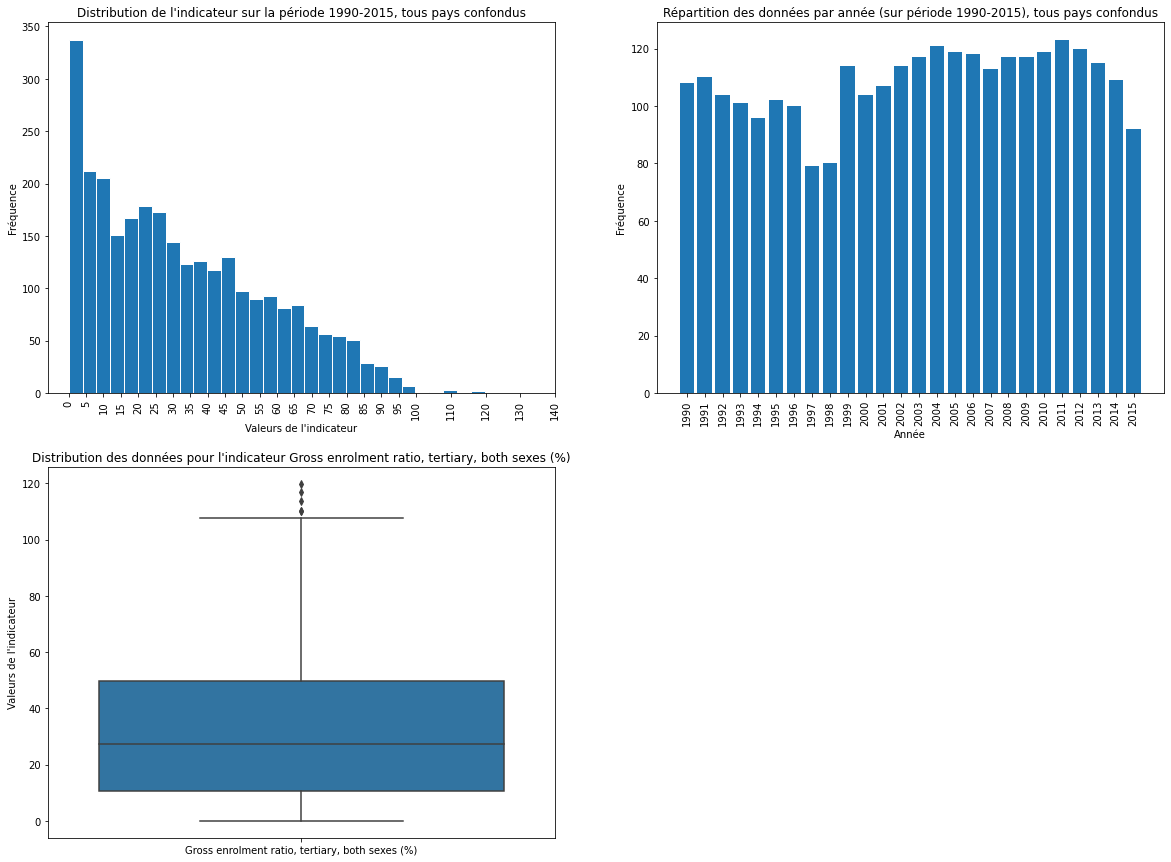

--------------------------
moyenne pour Gross enrolment ratio, tertiary, both sexes (%)
32.64880681369598

--------------------------
écart-type pour Gross enrolment ratio, tertiary, both sexes (%)
24.90154134198731

--------------------------
médiane pour Gross enrolment ratio, tertiary, both sexes (%)
27.5310897827148


In [88]:
#Calcul moyenne,écart-type, médiane et affichage graphes (distribution de données et boxplot)
list_xticks = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,110,120,130,140]
calcIndStatsGraph(data_enr_filtre_ana_pays, 'Gross enrolment ratio, tertiary, both sexes (%)',30,list_xticks)

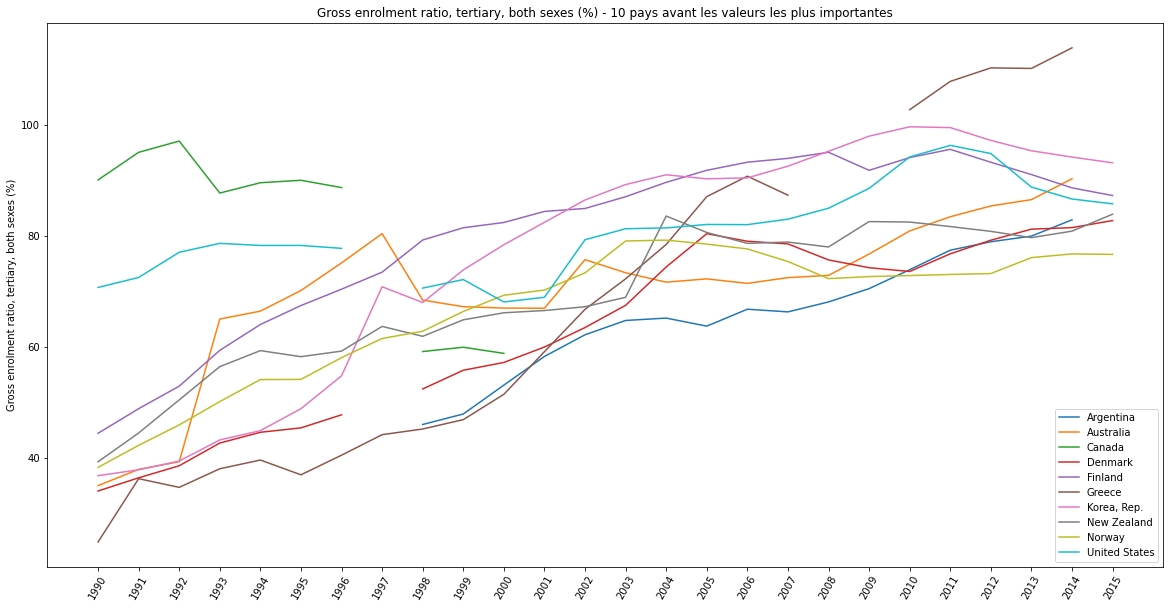

In [89]:
# Affichage graphe séries temporelles pour chaque indicateur pour les 10 premiers pays ayant un moyenne la plus élevée sur la période 1990-2015 
GraphSerieTempIndic(data_enr_filtre_ana_pays, 'Gross enrolment ratio, tertiary, both sexes (%)')

#### Distribution relativement homogène, peu asymétrique à droite (moyenne > médiane) de la distribution des valeurs de l’indicateur tous pays et année confondus,  sur la période 1990-2015 avec quelques valeurs au delà de 100%. 

#### Répartition homogène des données de l’indicateur sur toutes les années de la période, pas de trous dans les séries temporelles.

#### Présence d’outliers notamment pour la Grèce (taux au delà de 100 %).  Outliers explicables (voir définition de cet indicateur sur Internet).

#### => l'indicateur est retenu dans le cadre de l'étude.

### Indicateur "Gross enrolment ratio, upper secondary, both sexes (%)"

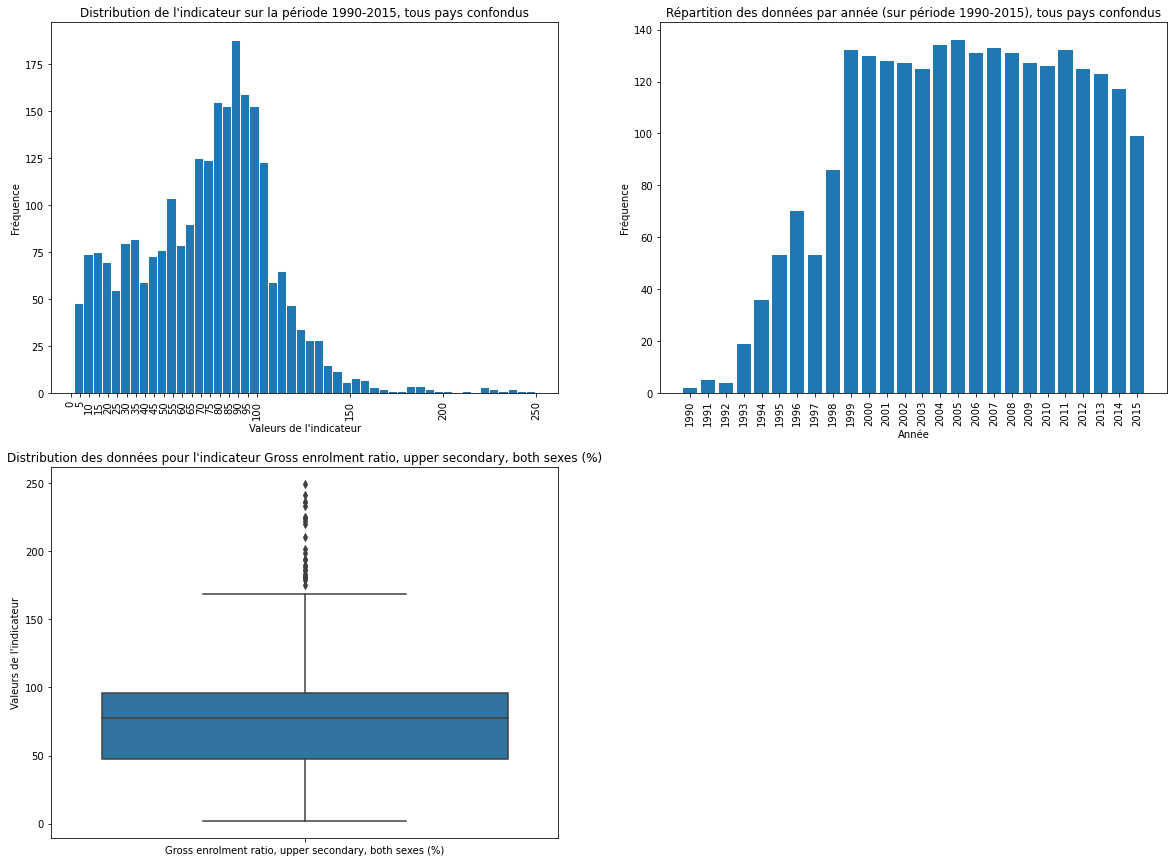

--------------------------
moyenne pour Gross enrolment ratio, upper secondary, both sexes (%)
72.80187338720198

--------------------------
écart-type pour Gross enrolment ratio, upper secondary, both sexes (%)
36.36581719764986

--------------------------
médiane pour Gross enrolment ratio, upper secondary, both sexes (%)
77.24240112304685


In [90]:
#Calcul moyenne,écart-type, médiane et affichage graphes (distribution de données et boxplot)
list_xticks = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,150,200,250]
calcIndStatsGraph(data_enr_filtre_ana_pays, 'Gross enrolment ratio, upper secondary, both sexes (%)',50,list_xticks)

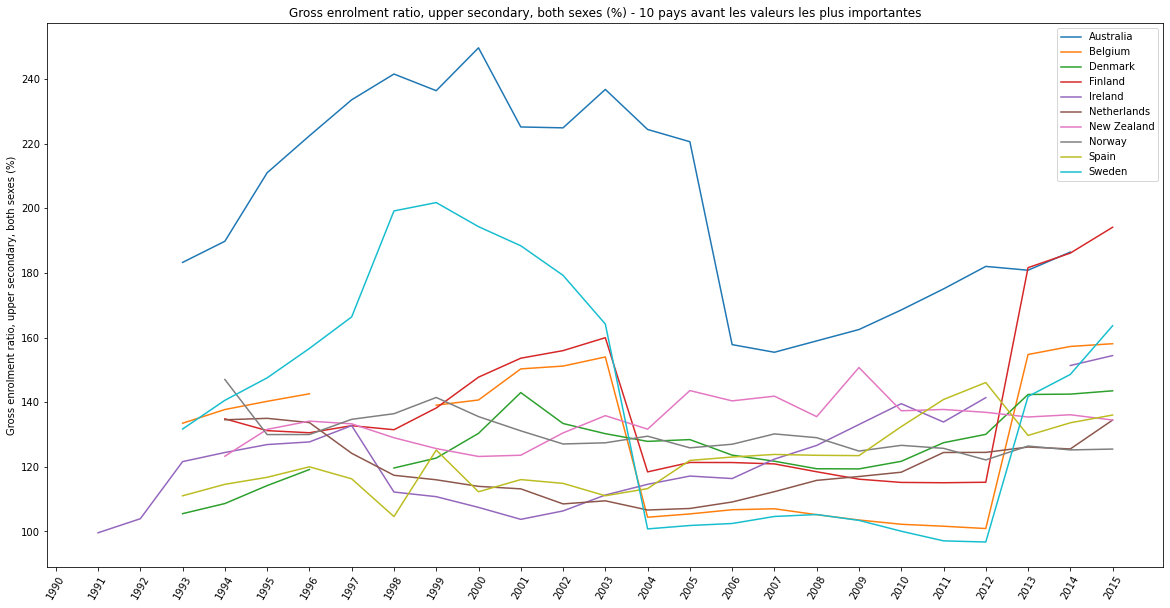

In [91]:
# Affichage graphe séries temporelles pour chaque indicateur pour les 10 premiers pays ayant un moyenne la plus élevée sur la période 1990-2015 
GraphSerieTempIndic(data_enr_filtre_ana_pays, 'Gross enrolment ratio, upper secondary, both sexes (%)')

#### Distribution relativement homogène, peu asymétrique à gauche (moyenne < médiane) de la distribution des valeurs de l’indicateur tous pays et année confondus,  sur la période 1990-2015 avec quelques valeurs au delà de 170%. 

#### Répartition des données de l’indicateur sur toutes les années de la période, pas de trous dans les séries temporelles.

#### Présence d’outliers notamment pour l'Australie, la Suède (taux au delà de 170 %). Outliers explicables (voir définition de cet indicateur sur Internet).

#### => l'indicateur est retenu dans le cadre de l'étude.

### Indicateur "Population of the official age for tertiary education, both sexes (number)"

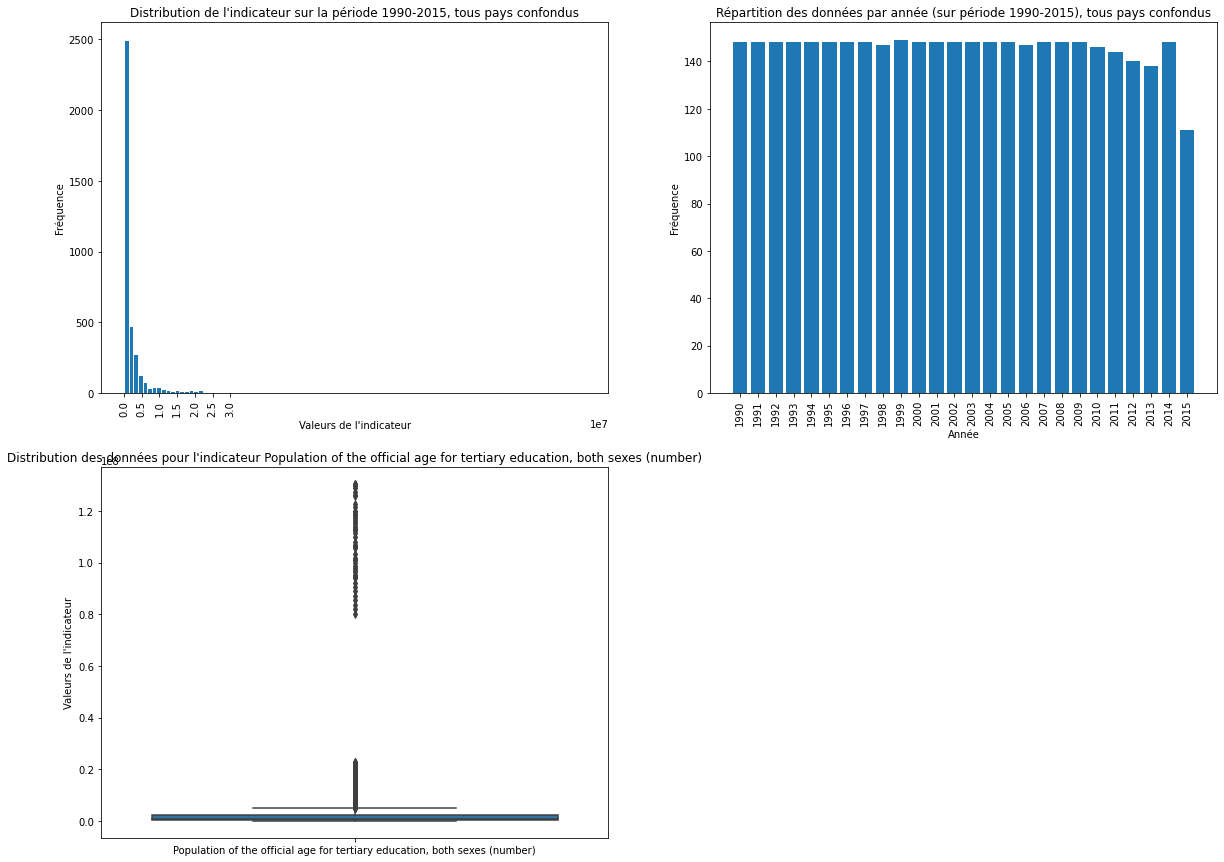

--------------------------
moyenne pour Population of the official age for tertiary education, both sexes (number)
3441928.462757528

--------------------------
écart-type pour Population of the official age for tertiary education, both sexes (number)
12947291.59711193

--------------------------
médiane pour Population of the official age for tertiary education, both sexes (number)
648538.5


In [92]:
#Calcul moyenne,écart-type, médiane et affichage graphes (distribution de données et boxplot)
list_xticks = [0,5000000,10000000,15000000,20000000,25000000,30000000]
calcIndStatsGraph(data_enr_filtre_ana_pays, 'Population of the official age for tertiary education, both sexes (number)',100,list_xticks)

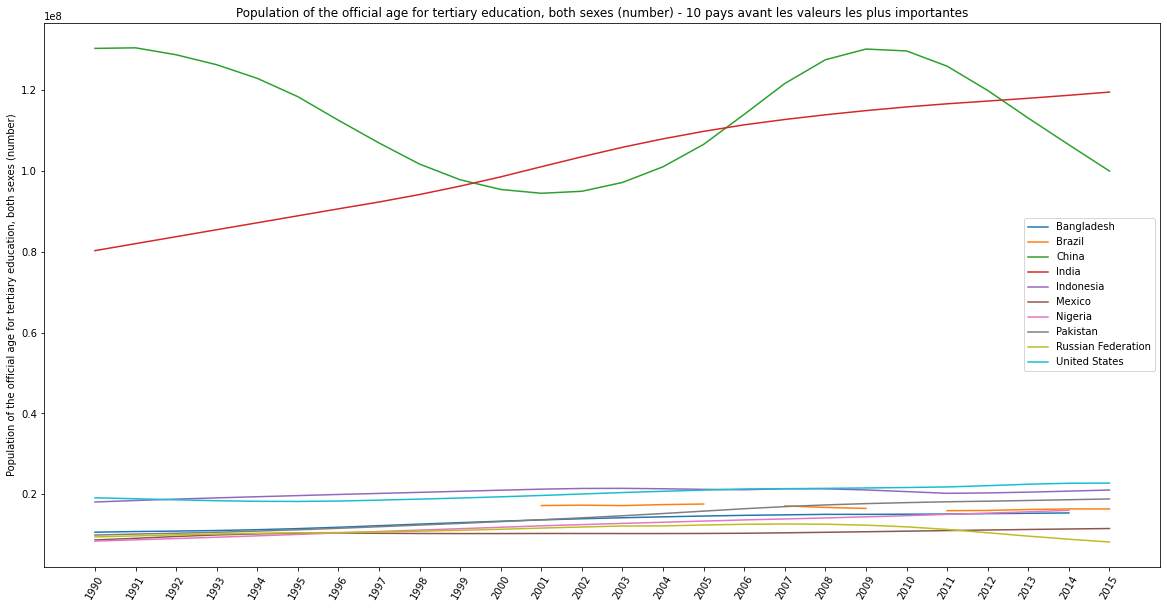

In [93]:
# Affichage graphe séries temporelles pour chaque indicateur pour les 10 premiers pays ayant un moyenne la plus élevée sur la période 1990-2015 
GraphSerieTempIndic(data_enr_filtre_ana_pays, 'Population of the official age for tertiary education, both sexes (number)')

### Indicateur "Population of the official age for upper secondary education, both sexes (number)"

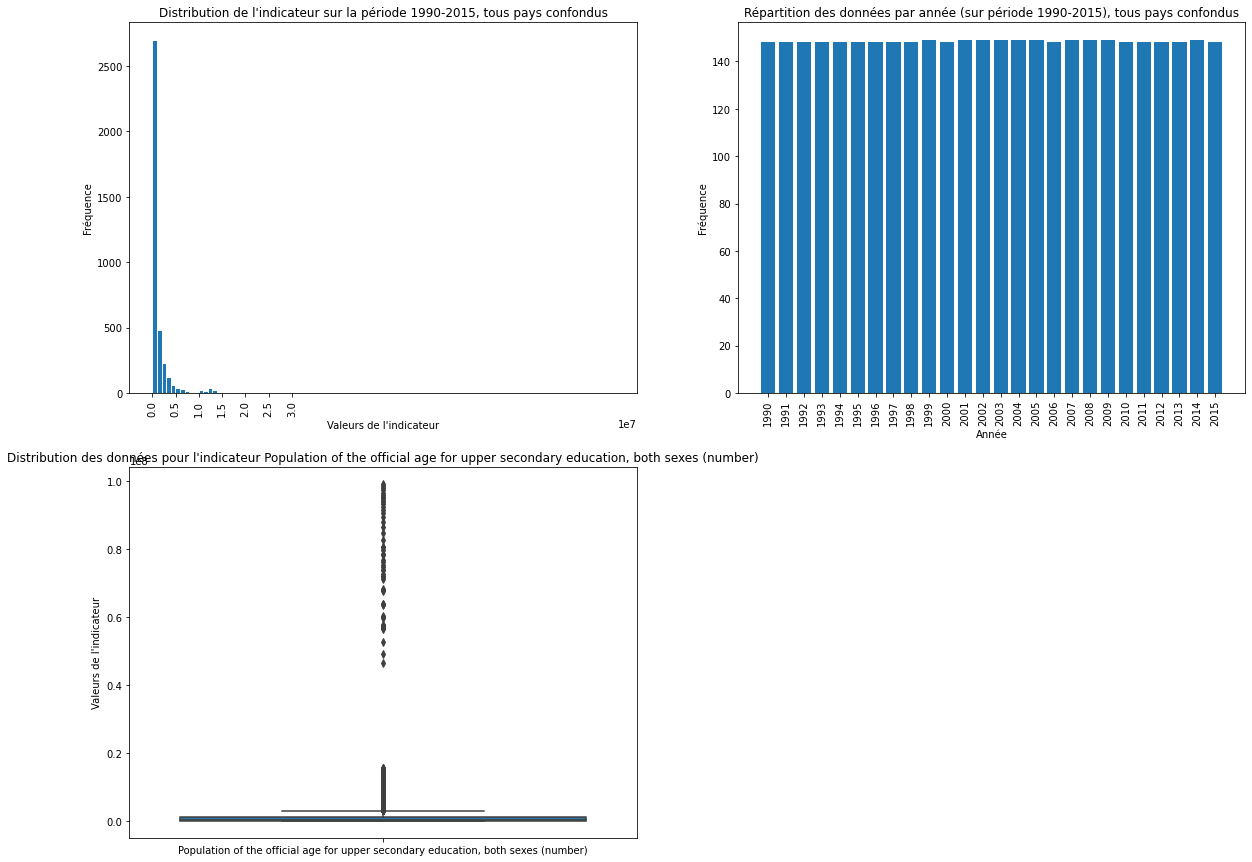

--------------------------
moyenne pour Population of the official age for upper secondary education, both sexes (number)
2260147.143856921

--------------------------
écart-type pour Population of the official age for upper secondary education, both sexes (number)
9133165.2399777

--------------------------
médiane pour Population of the official age for upper secondary education, both sexes (number)
392446.0


In [94]:
#Calcul moyenne,écart-type, médiane et affichage graphes (distribution de données et boxplot)
list_xticks = [0,5000000,10000000,15000000,20000000,25000000,30000000]
calcIndStatsGraph(data_enr_filtre_ana_pays, 'Population of the official age for upper secondary education, both sexes (number)',100,list_xticks)

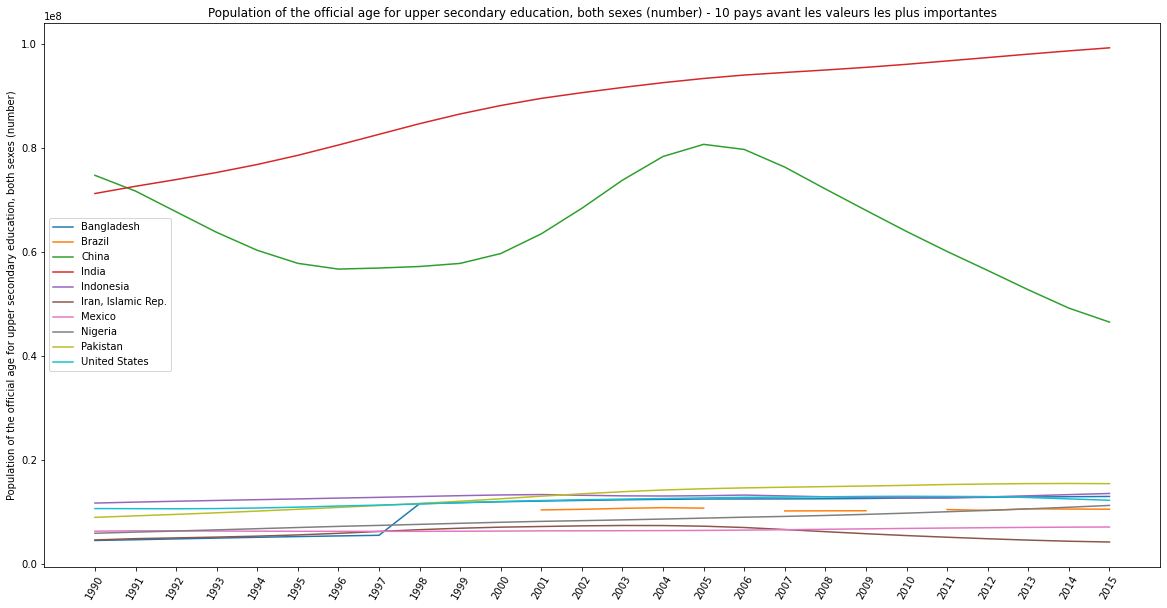

In [95]:
# Affichage graphe séries temporelles pour chaque indicateur pour les 10 premiers pays ayant un moyenne la plus élevée sur la période 1990-2015 
GraphSerieTempIndic(data_enr_filtre_ana_pays, 'Population of the official age for upper secondary education, both sexes (number)')

#### Distribution très fortement asymétrique à droite (moyenne > médiane) de la distribution des valeurs des indicateurs sur la population, tous pays et année confondus,  sur la période 1990-2015, ce qui s'explique par la disparité de nombre d'individus dans l'enseignement secondaire (lycées) et tertaire (universités) entre des pays comme la Chine, l'Inde, et les autres pays du monde avec moins d'individus dans la population.

#### Répartition des données de l’indicateur sur toutes les années de la période, pas de trous dans les séries temporelles.

#### Présence d’outliers notamment pour la Chine et l'Inde.

#### => l'indicateur est retenu dans le cadre de l'étude.

#### 4.3.8.2 Conclusion sur le 5ème filtrage des données

#### Suite au 4ème filtrage, il reste 8 indicateurs.

#### A l'issue du 5ème filtrage, 6 indicateurs sont conservés car:
 #### - l'écantillonnage des donnée est continu, ce qui rend l'indicateur exploitable sur la liste de pays retenus.
 #### - les données sont réparties sur la période d'années 1990-2015, sans trous pour certaines années
 #### - les outliers sont explicables par la disparités des données entre pays
 
#### Seuls les indicateurs "Government expenditure in secondary institutions education as % of GDP (%)" et "Government expenditure in tertiary institutions as % of GDP (%)" présentent une répartition non homogène des données pour la période 1990-2015, avec notamment, l'absence de données sur l'année 2015.  Même si ces indicateurs sont significatifs pour l'étude, ils sont écartés car ils ne pourront pas être utilisée pour le modèle de scoring.

### 4.3.9 Traitement des doublons

In [96]:
# Recupération de données duppliquées
data_enr_filtre_ana_pays[data_enr_filtre_ana_pays.duplicated()]

,Categ Indic,Topic,Region,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015


#### Il n'y a pas de doublons dans la dataset data.

## 5. Calcul d'un score d'attractivité pour chaque pays

#### On retient 8 indicateurs pour le calcul du score d'attractivité. Ces indicateurs sont regroupés par domaine (education, infrastructure, population, dépenses, revenus) et certains domaines contiennent 2 indicateurs pour lesquels on  fait une moyenne des valeurs.

#### Par ailleurs, le modèle de scoring est calculé sur la période 2010-2015 afin de ne fausser le score avec des données trop anciennes.

In [97]:
# Indicateurs sur l'éducation - Gross enrolment ratio, tertiary, both sexes (%)
#                             - Gross enrolment ratio, upper secondary, both sexes (%)
indicateur_education = ['SE.TER.ENRR','SE.SEC.ENRR.UP']

# Indicateurs sur les données macroéconomiques du pays
# NY.GDP.PCAP.CD - GDP per capita (current US$)
indicateur_pib = 'NY.GDP.PCAP.CD'

# Indicateurs sur les infrastructures de communication
# IT.NET.USER.P2 - Internet users (per 100 people)
indicateur_infra = 'IT.NET.USER.P2'

# Indicateurs sur la population
# SP.TER.TOTL.IN - Population of the official age for tertiary education, both sexes (number)
# SP.SEC.UTOT.IN - Population of the official age for upper secondary education, both sexes (number)
indicateur_population = ['SP.TER.TOTL.IN','SP.SEC.UTOT.IN']

# Sont regroupés tous les indicateurs
sel_indicateurs = indicateur_education + [indicateur_pib] + [indicateur_infra] + indicateur_population
data_sel_indic = data_enr_filtre_ana_pays[data_enr_filtre_ana_pays["Indicator Code"].isin(sel_indicateurs)]

In [98]:
# Prise en compte des données sur la période 2010-2015 
data_sel_indic["mean_2010_2015"] = data_sel_indic.loc[:, "2010":"2015"].mean(axis=1)

### 5.1 Modèle de scoring

#### Principes du modèle pour l'attribution d'un score d'attractivité par pays :

 - L'imputation des valeurs manquantes utilise la médiane

 - Une moyenne sur les indicateurs d'un même domaine est effectué pour obtenir qu'une seule valeur par domaine

 - Les valeurs sont standardisées par une mise à l'échelle des valeurs

 - le score d'attractivité par pays est calculé par moyenne arithmétique des 5 catégories d'indicateurs

#### Remarque: l'imputation des valeurs manquantes se base sur la médiane car elle est robuste aux outliers. Cette imputation est réalisée avant le calcul du score en utilisant la bibliothèque sklearn.preprocessing

In [99]:
# Fonction pour le modèle de scoring
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
imputer = SimpleImputer(strategy="median")
encoder = StandardScaler()

def score_attractivite(dataset, annee):
    df_final =  dataset.pivot_table(index='Country Name', columns="Indicator Code")[annee]
    df_final = pd.DataFrame(imputer.fit_transform(df_final), columns=df_final.columns, index=df_final.index)
    
    education = df_final[indicateur_education].mean(axis=1)
    pib = df_final[[indicateur_pib]].mean(axis=1)
    infra = df_final[[indicateur_infra]].mean(axis=1)
    population = df_final[indicateur_population].mean(axis=1)
    
    df_score = pd.DataFrame({'pib': pib, 'education' : education, 'infra' : infra, 'population': population})
    # score sur 20
    df_score_encoded = pd.DataFrame(encoder.fit_transform(df_score), index=df_score.index, columns=df_score.columns)
    df_score_encoded["attractivite"] = df_score_encoded.mean(axis=1)
    
    return df_score_encoded

In [100]:
# Calcul du score d'attractivité
df_score = score_attractivite(data_sel_indic,'mean_2010_2015')
df_score

,pib,education,infra,population,attractivite
Country Name,,,,,
Albania,-0.54,0.47,0.39,-0.25,0.02
Algeria,-0.51,-0.44,-0.78,-0.02,-0.44
Angola,-0.55,-1.61,-1.33,-0.11,-0.90
Argentina,-0.16,0.74,0.48,-0.03,0.26
Armenia,-0.57,0.35,-0.09,-0.25,-0.14
Aruba,0.41,0.02,1.16,-0.27,0.33
Australia,2.12,2.64,1.34,-0.17,1.48
Austria,1.54,0.99,1.30,-0.23,0.90
Azerbaijan,-0.42,-0.23,0.67,-0.22,-0.05


### 5.2 Liste des 15 pays les plus prioritaires

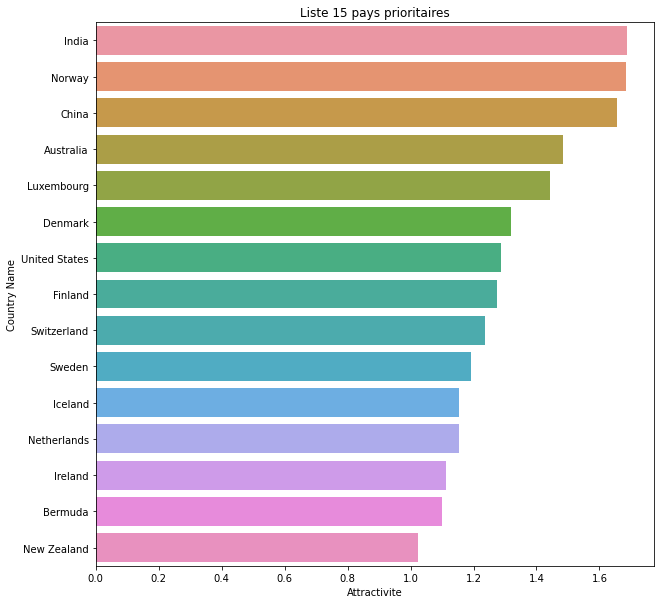

In [101]:
fig = plt.figure(1, figsize=(10, 10))
# Liste des 30 pays ayant le score le plus élevé (par ordre décroissant)
list_priority_countries = df_score["attractivite"].sort_values(ascending=False)[0:15]
sns.barplot(list_priority_countries.values, list_priority_countries.index, orient='h')
plt.xlabel("Attractivite")
plt.title("Liste 15 pays prioritaires")
plt.show()

#### Sur un score global, voci les 5 pays qui arrivent en tête: Inde, Norvège, Chine, Australie, Luxembourg

### 5.3 Evolution du potentiel des pays : projection en 2016

#### Une régréssion linéaire sur les années 2010 à 2015 est calculée pour chaque pays, permet d'avoir une projection pour l'année 2016.

In [102]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

df_potentiel = np.array([score_attractivite(data_sel_indic, year)["attractivite"] for year in ["2010", "2011", "2012", "2013", "2014", "2015"]]).T
x = np.array([2010, 2011, 2012, 2013, 2014, 2015]).reshape(-1,1)
score_2016 = []
for y in df_potentiel :
     lin_reg.fit(x, y.reshape(-1, 1))
     score_2016.append(lin_reg.predict(np.array([2016]).reshape(-1,1))[0][0])
df_score["attractivite_2016"] = score_2016

In [103]:
# Calcul de l'évolution du score entre 2014 et 2015
df_score["evol_potentiel"] = df_score["attractivite_2016"] - df_score["attractivite"]
df_score

,pib,education,infra,population,attractivite,attractivite_2016,evol_potentiel
Country Name,,,,,,,
Albania,-0.54,0.47,0.39,-0.25,0.02,0.07,0.06
Algeria,-0.51,-0.44,-0.78,-0.02,-0.44,-0.26,0.18
Angola,-0.55,-1.61,-1.33,-0.11,-0.90,-0.52,0.38
Argentina,-0.16,0.74,0.48,-0.03,0.26,0.23,-0.03
Armenia,-0.57,0.35,-0.09,-0.25,-0.14,-0.15,-0.01
Aruba,0.41,0.02,1.16,-0.27,0.33,-0.13,-0.47
Australia,2.12,2.64,1.34,-0.17,1.48,1.11,-0.37
Austria,1.54,0.99,1.30,-0.23,0.90,0.90,-0.01
Azerbaijan,-0.42,-0.23,0.67,-0.22,-0.05,0.03,0.08


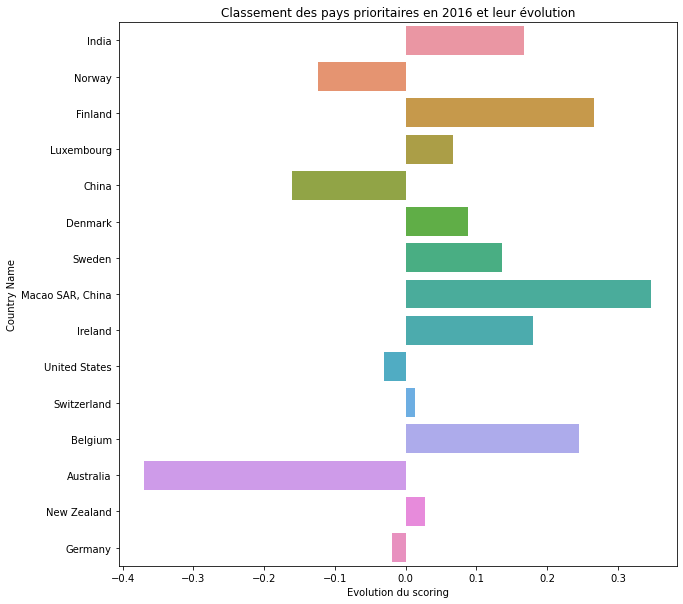

In [104]:
# Affichage de lévolution du potentiel
fig = plt.figure(1, figsize=(10, 10))
# Liste des 30 pays les mieux notés en 2015
list_futur_priority_countries = df_score["attractivite_2016"].sort_values(ascending=False)[0:15]

# Evolution du score des 15 pays les mieux notés en 2015
new_pays = df_score.loc[list_futur_priority_countries.index, :]["evol_potentiel"]
sns.barplot(new_pays.values, new_pays.index, orient='h')
plt.xlabel("Evolution du scoring")
plt.title("Classement des pays prioritaires en 2016 et leur évolution")
plt.show()

#### Parmi les pays, il y a des pays qui montent dans la classement: Inde, Finlande, Macao (Chine), Belgique,...

#### Parmi les pays, il y a des pays qui baissent dans le classement: Chine, Norvège, Etats-Unis, Australie...

### 5.4. Analyse des résultats

### 5.4.1 Score des pays pour chaque domaine

#### 5.4.1.1 Education

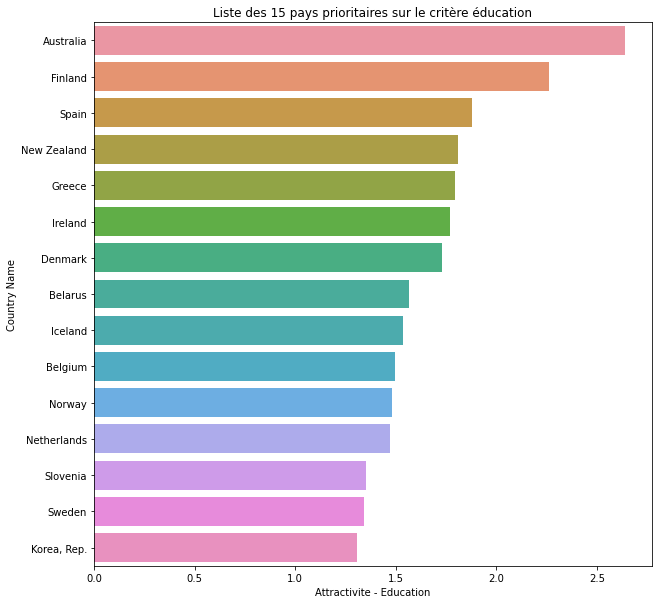

In [105]:
# Score education
list_pays_education= df_score['education'].sort_values(ascending=False)[0:15]
fig = plt.figure(1, figsize=(10, 10))
# Liste des 15 pays ayant le score le plus élevé (par ordre décroissant) sur le critère éducation
#list_priority_countries = df_score["attractivite"].sort_values(ascending=False)[0:30]
sns.barplot(list_pays_education.values, list_pays_education.index, orient='h')
plt.xlabel("Attractivite - Education")
plt.title("Liste des 15 pays prioritaires sur le critère éducation")
plt.show()

#### 5.4.1.2 Revenus par habitant

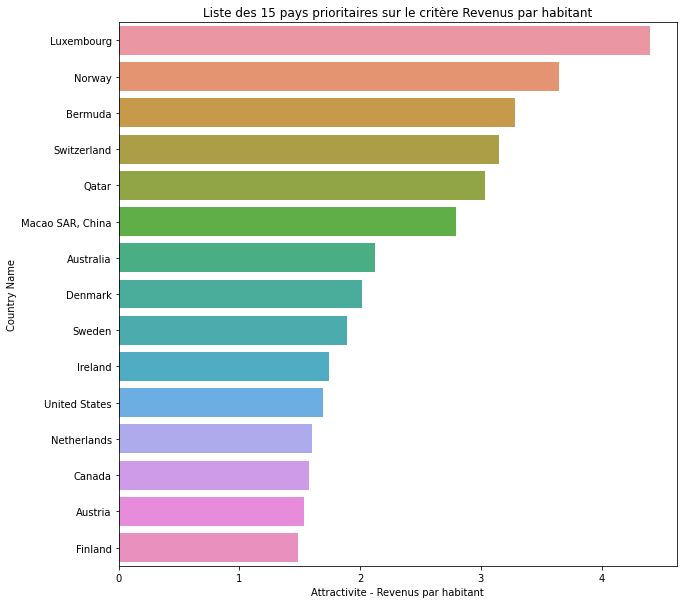

In [106]:
# Score pib
list_pays_pib= df_score['pib'].sort_values(ascending=False)[0:15]
fig = plt.figure(1, figsize=(10, 10))
# Liste des 15 pays ayant le score le plus élevé (par ordre décroissant) sur le critère pib
sns.barplot(list_pays_pib.values, list_pays_pib.index, orient='h')
plt.xlabel("Attractivite - Revenus par habitant")
plt.title("Liste des 15 pays prioritaires sur le critère Revenus par habitant")
plt.show()

#### 5.4.1.3 Infrastructure / communication

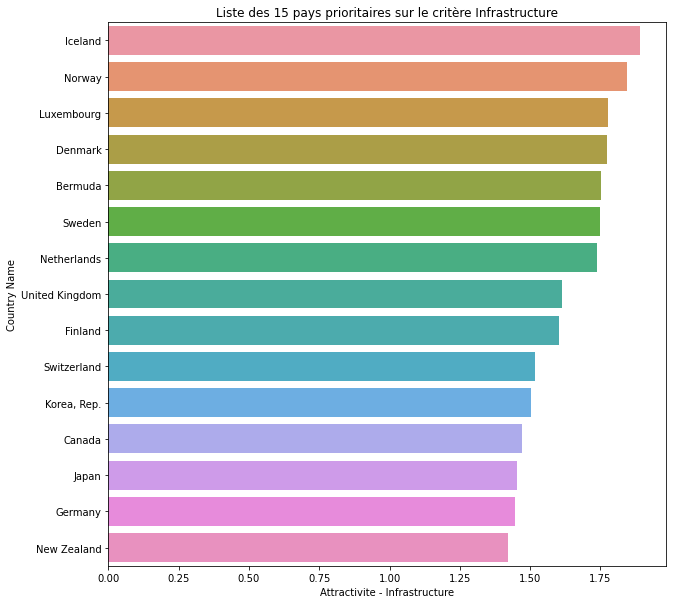

In [107]:
# Score infra
list_pays_infra= df_score['infra'].sort_values(ascending=False)[0:15]
fig = plt.figure(1, figsize=(10, 10))
# Liste des 15 pays ayant le score le plus élevé (par ordre décroissant) sur le critère infra
sns.barplot(list_pays_infra.values, list_pays_infra.index, orient='h')
plt.xlabel("Attractivite - Infrastructure")
plt.title("Liste des 15 pays prioritaires sur le critère Infrastructure")
plt.show()

#### 5.4.1.4 Population dans l'enseignement secondaire / tertiaire

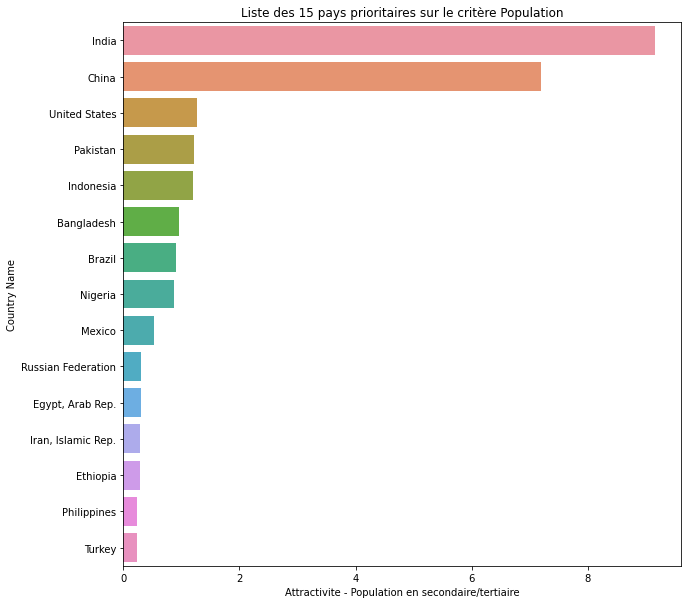

In [108]:
# Score population
list_pays_pop= df_score['population'].sort_values(ascending=False)[0:15]
fig = plt.figure(1, figsize=(10, 10))
# Liste des 15 pays ayant le score le plus élevé (par ordre décroissant) sur le critère populatiob=n
sns.barplot(list_pays_pop.values, list_pays_pop.index, orient='h')
plt.xlabel("Attractivite - Population en secondaire/tertiaire")
plt.title("Liste des 15 pays prioritaires sur le critère Population")
plt.show()

### 5.4.2 Analyse par régions

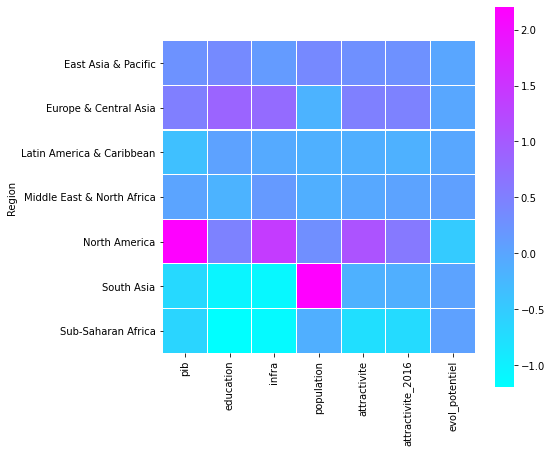

In [109]:
regions = data_sel_indic[["Country Name", "Region"]].drop_duplicates().set_index("Country Name")

df_score["Region"] = regions
df_score_per_region = df_score.groupby("Region").mean()

fig = plt.figure(1, figsize=(7, 7))
sns.heatmap(df_score_per_region, square=True, cmap="cool", linewidths=0.1)
plt.show()

#### L'Europe, l'Asie centrale et l'Amérique du nord connaissent les scores les plus élevés pour le score global.
#### L'Amérique du nord propose un bonne couverture Internet, un revenu par habitant élevé.
#### Les scores les plus bas concerent l'Afrique sub-saharienne.

### 5.4.3 Réprésentation du score par région sous forme de diagrammes en étoiles

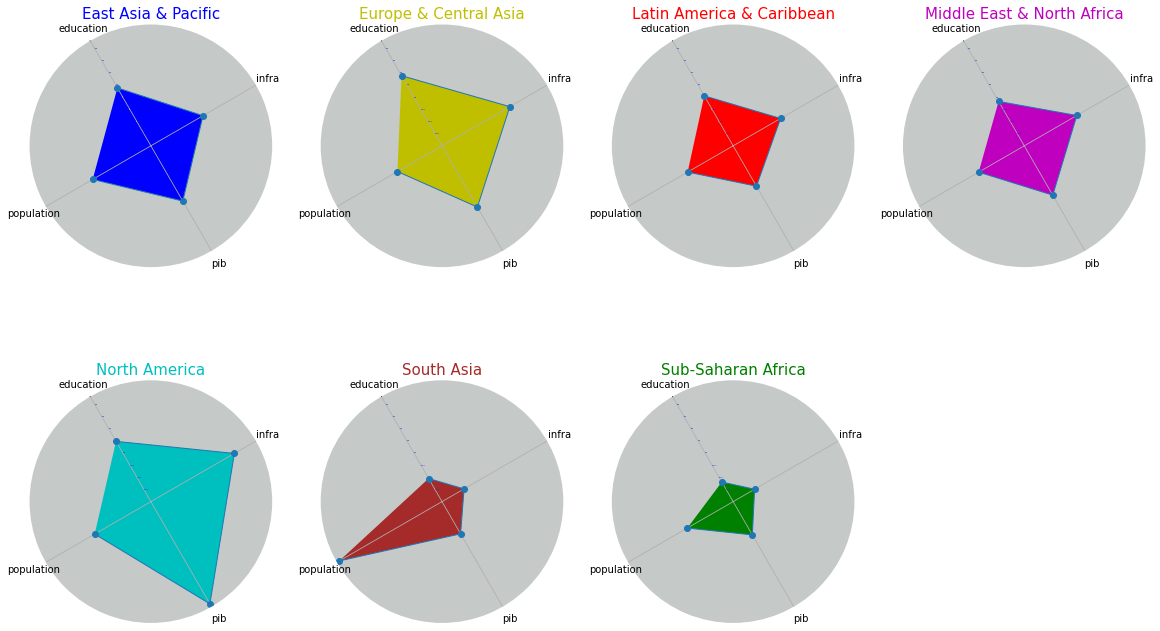

In [110]:
from math import pi

df_plot = df_score_per_region[['education','infra','pib', 'population']]

# number of variable
categories=list(df_plot.columns)
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles

 
fig = plt.figure(1, figsize=(20,12))
    
colors = ['blue', 'y', 'red', 'm', 'c', 'brown','g']

for i, region in enumerate(df_plot.index) : 
    
    ax = fig.add_subplot(2,4,i+1, polar=True)

    ax.set_facecolor("#C5C9C7")
    ax.set_theta_offset(2*pi/3)
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(0)

    # Draw one axe per variable + add labels labels yet
    #plt.xticks(angles, categories, size=8)
    plt.yticks(color="blue", size=2)
    values=df_plot.iloc[i].values
    ax.plot(angles, values, 'o-', linewidth=1)
    ax.fill(angles, values, colors[i], alpha=1)
    ax.set_xticks(angles)
    ax.set_xticklabels(categories)
    ax.set_title(region, size=15, color=colors[i])
    ax.grid(True)
    plt.ylim(-2,2.3)
    

plt.show()


#### Les pays qui ont le plus haut potentiel sont ceux qui la plus grande aire dans le graphique, à savoir l'Amérique du nord et l'Europe.
#### L'Afrique subsaharienne et l'Asie du Sud semblent être les régions ayant le moins de potentiel client


### 5.4.4 Affichage des diagrammes en étoiles pour le 8 pays ayant le score global le plus important

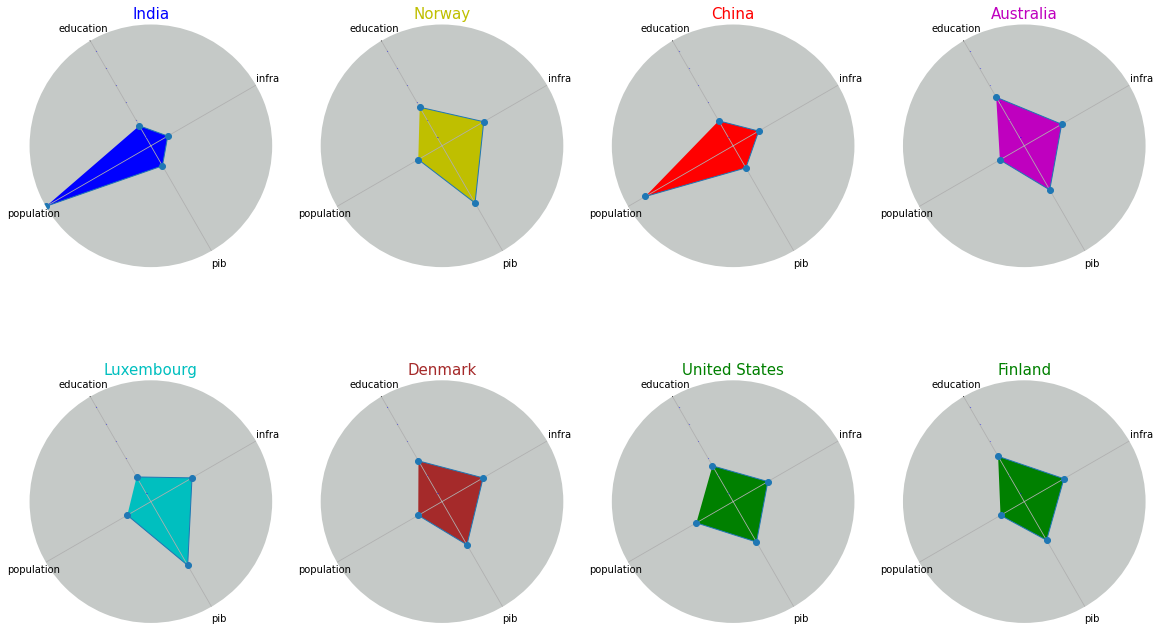

In [111]:
from math import pi

df_plot1 = df_score[df_score.index == 'India' ][['education','infra','pib', 'population']]
df_plot2 = df_score[df_score.index == 'Norway' ][['education','infra','pib', 'population']]
df_plot3 = df_score[df_score.index == 'China' ][['education','infra','pib', 'population']]
df_plot4 = df_score[df_score.index == 'Australia' ][['education','infra','pib', 'population']]
df_plot5 = df_score[df_score.index == 'Luxembourg' ][['education','infra','pib', 'population']]
df_plot6 = df_score[df_score.index == 'Denmark' ][['education','infra','pib', 'population']]
df_plot7 = df_score[df_score.index == 'United States' ][['education','infra','pib', 'population']]
df_plot8 = df_score[df_score.index == 'Finland' ][['education','infra','pib', 'population']]

frames = [df_plot1,df_plot2,df_plot3,df_plot4,df_plot5,df_plot6,df_plot7,df_plot8]
df_plot = pd.concat(frames)

# number of variable
categories=list(df_plot.columns)
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]

fig = plt.figure(1, figsize=(20,12))
    
colors = ['blue', 'y', 'red', 'm', 'c', 'brown','g','g']

for i, pays in enumerate(df_plot.index) : 
    
    ax = fig.add_subplot(2,4,i+1, polar=True)

    ax.set_facecolor("#C5C9C7")
    ax.set_theta_offset(2*pi/3)
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(0)
    
    # Draw one axe per variable + add labels labels yet
    #plt.xticks(angles, categories, size=8)
    plt.yticks(color="blue", size=2)
    values=df_plot.iloc[i].values
    ax.plot(angles, values, 'o-', linewidth=1)
    ax.fill(angles, values, colors[i], alpha=1)
    ax.set_xticks(angles)
    ax.set_xticklabels(categories)
    ax.set_title(pays, size=15, color=colors[i])
    ax.grid(True)
    plt.ylim(-3,9.2)
    
plt.show()   


#### Des pays ont des performance relativement homogènes sur les différentes composantes du score global, comme les Etats-Unis, l'Australie, le Danemark.

#### D'autres pays ont des composantes prépondérantes (comme la population) pour la Chine ou l'Inde.

### 5.4.5 Affichage de relations entre indicateurs sous forme de diagrammes regplot

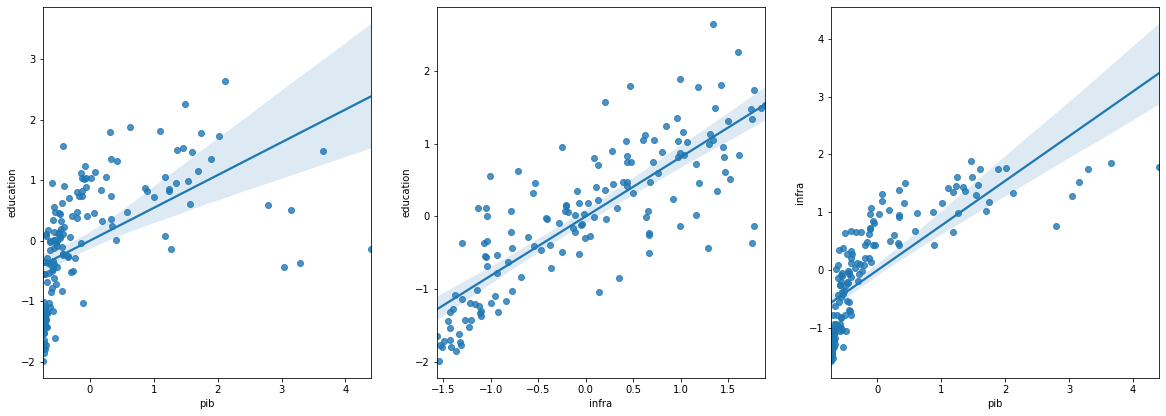

In [112]:
# Affichage de relations possibles entre les différentes catégories d'indicateurs du score
fig = plt.figure(1, figsize=(20,15))
plt.subplot(231)
sns.regplot(x=df_score['pib'], y=df_score['education'], fit_reg=True)
plt.subplot(232)
sns.regplot(x=df_score['infra'], y=df_score['education'], fit_reg=True)
plt.subplot(233)
sns.regplot(x=df_score['pib'], y=df_score['infra'], fit_reg=True)

plt.show()

#### Il n'y a pas de relation linéaire claire entre les domaines d'indicateurs constituant le score

#### Le modèle de scoring devrait être affiné en déterminant si les indicateurs ou domaines d'indicateurs sont corrélés ou pas. Ainsi si des indicateurs du scoring sont trop corrélés, cela peut remettre en cause l'utilisation de ces indicateurs dans le score.


## 6. Conclusions sur la pertinence du  jeu  de données

Le dataset contient **des informations pertinentes et varieés pour répondre à la problématique de la EdTech Academy** :

* prise en compte d’une liste exhaustive des pays

* présence d’indicateurs significatifs mesurant les composantes de l’éducation au niveau lycées et universités:
    * indicateurs démographiques sur l’éducation 
    * indicateurs sur les politiques d’investissement des pays
    * indicateurs sur des données macro-économiques (PIB par habitant, …)
    
* les indicateurs sont tracés afin de donner la source des données

**Mais avec certaines lacunes:**

* le taux de valeurs manquantes est très élevé sur la période 2010-2015 utilisée pour le scoring (en viron 80% de valeurs NaN) accordant plus de poids au pays disposant d’outils de collecte/traitement statistiques élaborés

* le jeu de données manque d'éléments sur l’intérêt de la population sur l'utilisation de la formation en ligne, les dépenses sur Internet, la proportion d'élèves se formant en dehors de leur établissement scolaire (soutien scolaire,...).